## Vehicle Detection

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.


## 1.Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images

In [ ]:
# add video car in bound of view
#store video image
import cv2
import numpy as np
vc = cv2.VideoCapture("project_video.mp4") #read video file
c=1

if vc.isOpened(): #judge open
    rval , frame = vc.read()
    print(1)
else:
    rval = False

timeF = 1  #set frequence

while rval:   #loop read frame
    rval, frame = vc.read()
    #print(c)
    if(c%timeF == 0): #per time to operate
        print(c)
        cv2.imwrite('image/'+str(c) + '.jpg',frame) #save image
    c = c + 1
    cv2.waitKey(1)
vc.release()

In [9]:
# clip car in bound of view
for i in range(117,160):
    img = mpimg.imread('image/'+str(i) + '.jpg')
    
    cv2.imwrite('MY_video/'+str(i) + '.jpg', cv2.resize(img[400:550,1100:img.shape[1],:],(64,64)))
    img2 = np.fliplr(img[400:550,1100:img.shape[1],:])
    cv2.imwrite('MY_video/mirror_'+str(i) + '.jpg',cv2.resize(img2,(64,64)))
for j in range(676,722):
    img = mpimg.imread('image/'+str(j) + '.jpg')
    cv2.imwrite('MY_video/'+str(j) + '.jpg',cv2.resize(img[400:650,1100:img.shape[1],:],(64,64)))
    img2 = np.fliplr(img[400:650,1000:img.shape[1],:])
    cv2.imwrite('MY_video/mirror_'+str(j) + '.jpg',cv2.resize(img2,(64,64)))

C:\Users\w2764\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(17760, 1764)


Text(0.5,1,'HOG Visualization')

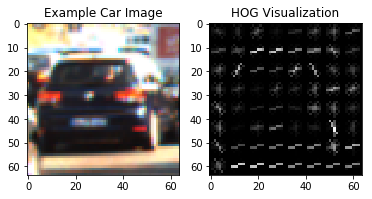

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
%matplotlib inline

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False,
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features



# Read in our vehicles and non-vehicles
images = glob.glob('train/*/*/*.png')
cars = []
notcars = []

orient = 9
pix_per_cell = 8
cell_per_block = 2

measurements = []
labels = []
for image in images:
    #print(image)
    image0 = mpimg.imread(image)
    gray = cv2.cvtColor(image0, cv2.COLOR_RGB2GRAY)# Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    tempFeature =  get_hog_features(gray, orient,pix_per_cell, cell_per_block,vis=False, feature_vec=True)
    
    if 'non-vehicles' in image :
        #print(0)
        notcars.append(image)
        measurements.append(tempFeature)
        labels.append(0)
    else:
        #print(1)
        cars.append(image)
        measurements.append(tempFeature)
        labels.append(1)
        

measurements = np.array(measurements)
labels = np.array(labels)
print(measurements.shape)


# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])#cars[ind])


gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient,pix_per_cell, cell_per_block,vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')

plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')




Text(0.5,1,'No Car Image')

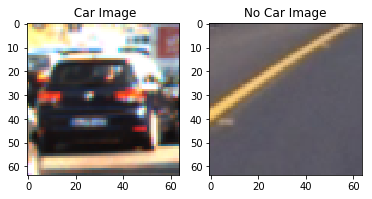

In [51]:
# Plot the examples
image = mpimg.imread(cars[ind])
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title(' Car Image')

image = mpimg.imread(notcars[ind])
plt.subplot(122)
plt.imshow(image, cmap='gray')
plt.title('No Car Image')

C:\Users\w2764\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Text(0.5,1,'No Car CH3 feature')

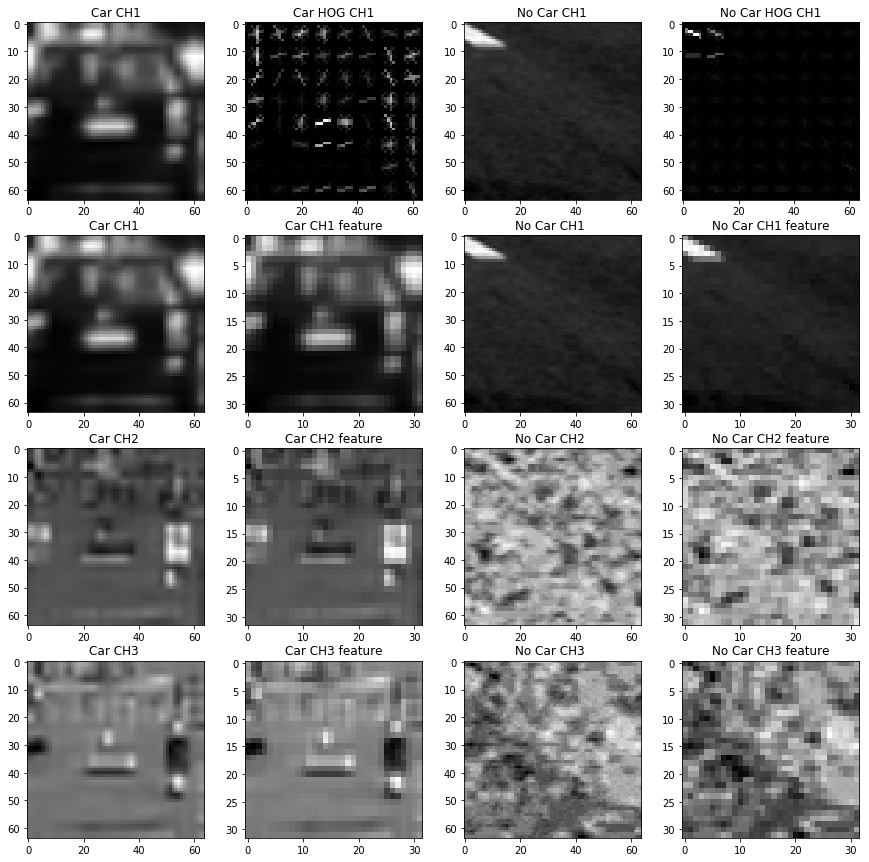

In [14]:

# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)# Can be RGB, HSV, LUV, HLS, YUV, YCrCb

gray = cv2.resize(image, (32,32))
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(image[:,:,0], orient,pix_per_cell, cell_per_block,vis=True, feature_vec=False)


fig, [[axs1,axs2,axs3,axs4],[axs21,axs22,axs23,axs24],[axs31,axs32,axs33,axs34],[axs41,axs42,axs43,axs44]] = plt.subplots(4,4,figsize=(15,15))

axs1.imshow(image[:,:,0], cmap='gray')
axs1.set_title('Car CH1')

axs2.imshow(hog_image, cmap='gray')
axs2.set_title('Car HOG CH1')

axs21.imshow(image[:,:,0], cmap='gray')
axs21.set_title('Car CH1 ')

axs22.imshow(gray[:,:,0], cmap='gray')
axs22.set_title('Car CH1 feature')



axs31.imshow(image[:,:,1], cmap='gray')
axs31.set_title('Car CH2 ')

axs32.imshow(gray[:,:,1], cmap='gray')
axs32.set_title('Car CH2 feature')


axs41.imshow(image[:,:,2], cmap='gray')
axs41.set_title('Car CH3 ')

axs42.imshow(gray[:,:,2], cmap='gray')
axs42.set_title('Car CH3 feature')

image = mpimg.imread(notcars[ind])
image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

gray = cv2.resize(image, (32,32))
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(image[:,:,0], orient,pix_per_cell, cell_per_block,vis=True, feature_vec=False)

axs3.imshow(image[:,:,0], cmap='gray')
axs3.set_title('No Car CH1')

axs4.imshow(hog_image, cmap='gray')
axs4.set_title('No Car HOG CH1')

axs23.imshow(image[:,:,0], cmap='gray')
axs23.set_title('No Car CH1 ')

axs24.imshow(gray[:,:,0], cmap='gray')
axs24.set_title('No Car CH1 feature')



axs33.imshow(image[:,:,1], cmap='gray')
axs33.set_title('No Car CH2 ')

axs34.imshow(gray[:,:,1], cmap='gray')
axs34.set_title('No Car CH2 feature')


axs43.imshow(image[:,:,2], cmap='gray')
axs43.set_title('No Car CH3 ')

axs44.imshow(gray[:,:,2], cmap='gray')
axs44.set_title('No Car CH3 feature')

## 2.train a classifier Linear SVM classifier

In [2]:
import numpy as np
import cv2
from skimage.feature import hog

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
       
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [3]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.utils import shuffle
# fit a SVM model to the data
svc = SVC()
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import time

color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

spatial_size = (16,16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins


hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()
#############################

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)  
print(X.shape)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

X_scaler = StandardScaler().fit(X)

scaled_X = X_scaler.transform(X)
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
scaled_X, y, test_size=0.2, random_state=rand_state)




#############################

t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()

print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

t=time.time()
print('train ok ')


############################

C:\Users\w2764\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\w2764\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(17760, 6108)
366.52 Seconds to train SVC...
Test Accuracy of SVC =  0.9927
train ok 


In [4]:
import pickle
output = open('model.pkl', 'wb')
'''
svc = model
X_scaler = StandardScaler().fit(x)
'''
data ={}
data['svc']=svc 
data['X_scaler']=X_scaler
pickle.dump(data , output)


## 3.Implement a sliding-window technique and use your trained classifier to search for vehicles in images

158
78
38
9


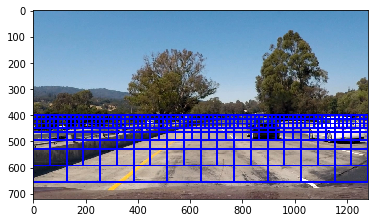

In [3]:
### import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test_images/test1.jpg')

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    

##########################
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

window_img =image
sizey = [50, 100,200,300]
scale = [32,64,128,256]
for i in range(4):
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 400+sizey[i] ], 
              xy_window=(scale[i], scale[i]), xy_overlap=(0.5, 0.5))


    print(len(windows))
    window_img = draw_boxes( window_img, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

C:\Users\w2764\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[]
0.68 Seconds to get detect location
[]
0.03 Seconds to get detect location
[[1044  348 1236  540]]
0.34 Seconds to get detect location
[[1044  348 1236  540]]
0.34 Seconds to get detect location


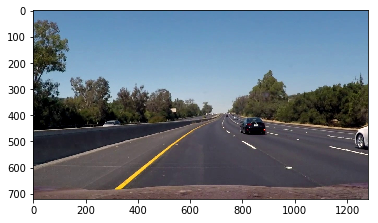

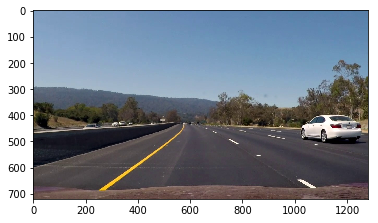

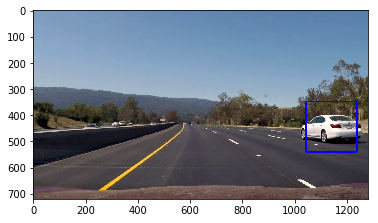

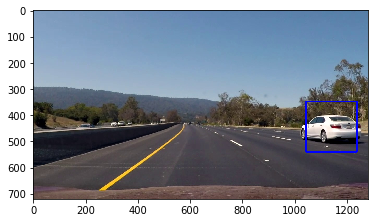

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import time

img = mpimg.imread('image/1198.jpg')

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, xstart, xstop,ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,xstart:xstop,:]
    
    
    box_list =[]
   
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2

    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1

    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)


    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
           
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction

            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)

            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw +xstart,ytop_draw+win_draw+ystart),(0,0,255),6) 
                box_list.append([xbox_left+xstart,ytop_draw+ystart,xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart])
    return draw_img,np.array(box_list)

ystart = 300
ystop = 500#656
scale = 2
xstart=900
xstop=img.shape[1]

dist_pickle = pickle.load( open('model.pkl', 'rb') )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]

orient = 9
pix_per_cell = 8
cell_per_block = 2

spatial_size = (16,16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins

window_img =image

img = mpimg.imread('image/1198.jpg')
t=time.time()
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
t2 = time.time()
plt.figure()
plt.imshow(out_img)
print(box_list)
print(round(t2-t, 2), 'Seconds to get detect location')

ystart = 400
ystop = 450#656
scale = 1
img = mpimg.imread('image/268.jpg')
t=time.time()
out_img,box_list = find_cars(img, xstart, xstop,ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
t2 = time.time()
plt.figure()
plt.imshow(out_img)
print(box_list)
print(round(t2-t, 2), 'Seconds to get detect location')

ystart = 300
ystop = 600#656
scale = 3
img = mpimg.imread('image/268.jpg')
t=time.time()
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
t2 = time.time()
plt.figure()
plt.imshow(out_img)
print(box_list)
print(round(t2-t, 2), 'Seconds to get detect location')

ystart = 300
ystop = 600#656
scale = 3
img = mpimg.imread('image/269.jpg')
t=time.time()
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
t2 = time.time()
plt.figure()
plt.imshow(out_img)
print(box_list)
print(round(t2-t, 2), 'Seconds to get detect location')

[[ 992  396 1120  524]
 [1024  396 1152  524]
 [1056  396 1184  524]
 [1088  396 1216  524]
 [1120  396 1248  524]]
9.76 Seconds to get detect location


Text(0.5,1,'example4')

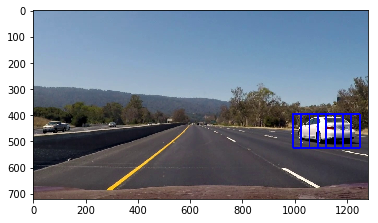

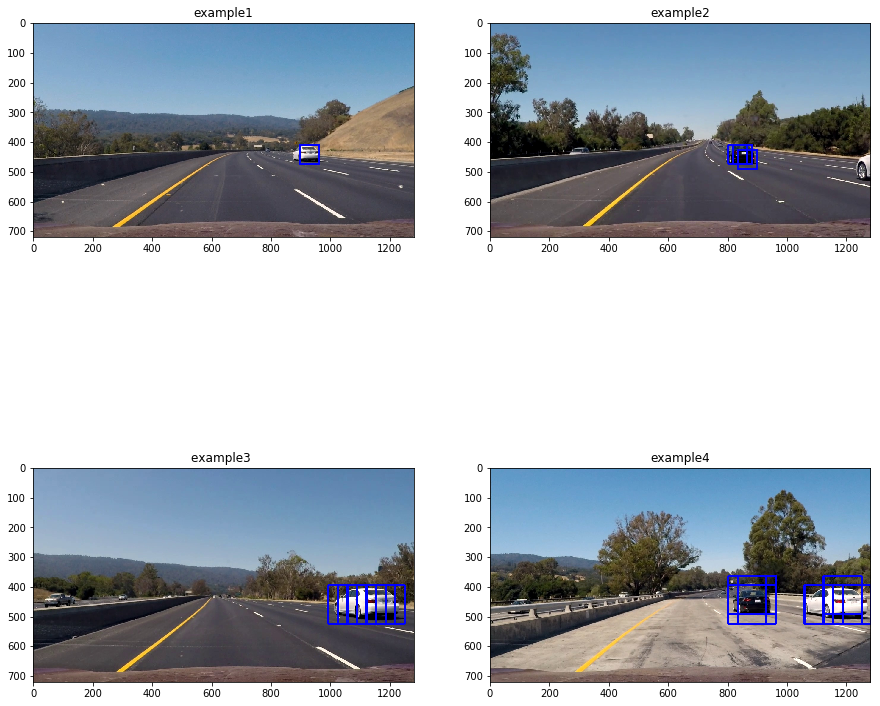

In [59]:
ystart = 300
ystop = 600#656
scale = 2
img = mpimg.imread('image/290.jpg')
t=time.time()
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
t2 = time.time()
plt.figure()
plt.imshow(out_img)
print(box_list)
print(round(t2-t, 2), 'Seconds to get detect location')


xstart=0
xstop=img.shape[1]

fig, [[axs1,axs2],[axs3,axs4]] = plt.subplots(2,2,figsize=(15,15))

scale = 1
img = mpimg.imread('test_images/test3.jpg')
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
axs1.imshow(out_img, cmap='gray')
axs1.set_title('example1')

scale = 1
img = mpimg.imread('image/1198.jpg')
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
axs2.imshow(out_img, cmap='gray')
axs2.set_title('example2')

scale = 2
img = mpimg.imread('image/290.jpg')
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
axs3.imshow(out_img, cmap='gray')
axs3.set_title('example3 ')

scale = 2
img = mpimg.imread('test_images/test1.jpg')
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
axs4.imshow(out_img, cmap='gray')
axs4.set_title('example4')

C:\Users\w2764\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[[ 800  396  928  524]
 [ 832  364  960  492]
 [ 832  396  960  524]
 [1024  396 1152  524]
 [1056  396 1184  524]
 [1088  396 1216  524]]
7.27 Seconds to get detect location


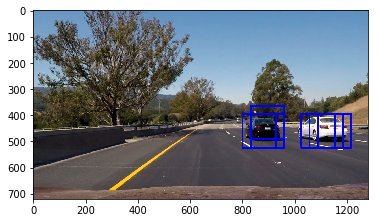

In [5]:
ystart = 300
ystop = 650#656
scale =2
xstart=0
xstop =1280
img = mpimg.imread('test_images/test6.jpg')
t=time.time()
out_img,box_list = find_cars(img,xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
t2 = time.time()
plt.figure()
plt.imshow(out_img)
print(box_list)
print(round(t2-t, 2), 'Seconds to get detect location')

[[1044  348 1236  540]]
[((1044, 348), (1235, 539))]


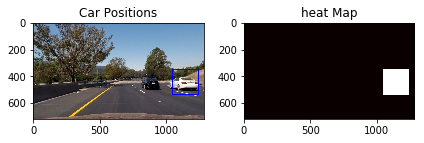

In [38]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
print(box_list )

# Read in image similar to one shown above 
image =  mpimg.imread('test_images/test6.jpg')
mtx =np.array([[1.15777818e+03 ,0.00000000e+00, 6.67113857e+02],
         [0.00000000e+00 ,1.15282217e+03, 3.86124583e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist =np.array( [[-0.24688507, -0.02373154, -0.00109831 , 0.00035107 ,-0.00259869]]  )

image = cv2.undistort(image, mtx, dist, None, mtx)
#print(image.shape)
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[1]:box[3], box[0]:box[2]]  += 1
    
   
    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    bboxs =[]
    bbox = []
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        if  len(bbox) !=0:
             bboxs.extend([bbox])
    # Return the image
    return img,bboxs

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img,bboxs = draw_labeled_bboxes(np.copy(image), labels)

print(bboxs)
output = np.zeros_like(heat)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
output[(heat!=0)] = 1

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heat, cmap='hot')
plt.title('heat Map')
fig.tight_layout()


## 4.Run your pipeline on a video stream and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles

[array([800, 382, 928, 510]), array([832, 382, 960, 510]), array([832, 414, 960, 542]), array([1120,  382, 1248,  510]), array([1120,  414, 1248,  542]), array([800, 350, 960, 510]), array([800, 390, 960, 550]), array([1040,  390, 1200,  550]), array([1080,  350, 1240,  510]), array([1080,  390, 1240,  550]), array([1120,  350, 1280,  510]), array([1120,  390, 1280,  550]), array([768, 350, 960, 542]), array([ 816,  350, 1008,  542]), array([1056,  350, 1248,  542])]
[((768, 350), (1007, 549)), ((1040, 350), (1279, 549)), ((800, 400), (1280, 650)), ((0, 400), (300, 650))]


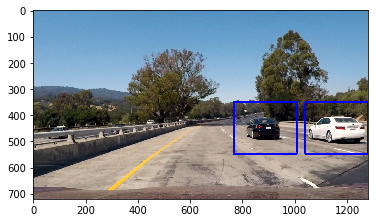

In [48]:
import matplotlib.pyplot as plt
import queue
dist_pickle = pickle.load( open('model.pkl', 'rb') )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]
def Lane_Finding_Pipeline(image,svc,X_scaler,location):
    
    '''
    # undistort image
    mtx =np.array([[1.15777818e+03 ,0.00000000e+00, 6.67113857e+02],
             [0.00000000e+00 ,1.15282217e+03, 3.86124583e+02],
             [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

    dist =np.array( [[-0.24688507, -0.02373154, -0.00109831 , 0.00035107 ,-0.00259869]]  )

    image = cv2.undistort(image, mtx, dist, None, mtx)
    '''
    

    color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
  
    bboxs =[]
    
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    spatial_size = (16,16) # Spatial binning dimensions
    hist_bins = 16    # Number of histogram bins


    hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
    spatial_feat = True # Spatial features on or off
    hist_feat = True # Histogram features on or off
    hog_feat = True # HOG features on or off
    y_start_stop = [None, None] # Min and max in y to search in slide_window()
    
    if location.empty():
        box_list = []
        ystart = 350
        ystop = 656
       

        xstart = 0
        xstop = image.shape[1]
        
        for i in [2,2.5,3]:
            scale =i
            out_img, tempbox_list= find_cars( image, xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
            box_list.extend(tempbox_list)
        ###################
        ystart = 350
        ystop = 500
       

        xstart = 0
        xstop = image.shape[1]
        
        scale = 1
        out_img,tempbox_list = find_cars( image, xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

        box_list.extend(tempbox_list)
        print(box_list)
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        # Add heat to each box in box list
        heat = add_heat(heat,box_list)

        # Apply threshold to help remove false positives
        heat = apply_threshold(heat,1)

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        draw_img,bboxs = draw_labeled_bboxes(np.copy(image), labels)
        bboxs.extend([((800,400),(img.shape[1],650))])
        bboxs.extend([((0,400),(300,650))])
      
       
    else:
        #特定区域扫描
        box_list = []
        while not location.empty():
 
            poss = location.get()
            for j in range(len(poss)):
                pos = poss[j]
                print(pos)
                
                #########################
                ystart = pos[0][1]-50
                ystop = pos[1][1]+50
                

                xstart = pos[0][0]-100
                xstop = pos[1][0]+100
                #####################
                if xstop > image.shape[1]:
                    xstop = image.shape[1]
                if xstart < 0:
                    xstart =0
                if xstart > 1000:
                    xstop = image.shape[1]
                ######################
                if (xstart ==0)|(xstop == image.shape[1]):
                    for i in [2,2.5,3]:
                        scale =i
                        out_img, tempbox_list= find_cars( image, xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
                        box_list.extend(tempbox_list)
                else:
                    scale =(((ystart)*1.5)/( 720))
                    out_img, tempbox_list= find_cars( image, xstart, xstop, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
                    box_list.extend(tempbox_list)
                
                print('scale:'+str(scale))
               
    
       
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        # Add heat to each box in box list
        heat = add_heat(heat,box_list)

        # Apply threshold to help remove false positives
        heat = apply_threshold(heat,1)

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        draw_img,bboxs = draw_labeled_bboxes(np.copy(image), labels)
        bboxs.extend([((800,400),(img.shape[1],650))])
        bboxs.extend([((0,400),(300,650))])
        
     
    return draw_img,bboxs
image = mpimg.imread('test_images/test1.jpg')
location  = queue.LifoQueue(maxsize = 2)
result2,bboxs =Lane_Finding_Pipeline(image,svc,X_scaler,location)
plt.imshow(result2)

print(bboxs)


In [34]:
ystop = 400
scale =(((ystop)*2)/( 720))
print('scale:'+str(scale))

scale:1.1111111111111112


In [7]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import cv2




def HLStogray(image):
    gray0 = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)# Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    gray = gray0 
    return gray

#location = queue.LifoQueue(maxsize = 2)



def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    global svc
    global X_scaler
    global location 
    result,boxxs= Lane_Finding_Pipeline(image,svc,X_scaler,location)
    if (location.empty()) & (len(boxxs)!=0):
        location.put(boxxs)

   
    print(location)
    #result =HLStogray(image)
    return result

710
[array([1040,  430, 1200,  590]), array([1056,  398, 1248,  590]), array([880, 414, 944, 478])]
711
((1040, 398), (1247, 589))
scale:3
((880, 414), (943, 477))
scale:0.7583333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3
712
((1100, 390), (1259, 549))
scale:3
((877, 412), (948, 471))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3
713
((828, 382), (955, 509))
scale:0.6916666666666667
((1036, 398), (1227, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3
714
((828, 382), (955, 509))
scale:0.6916666666666667
((1032, 396), (1227, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


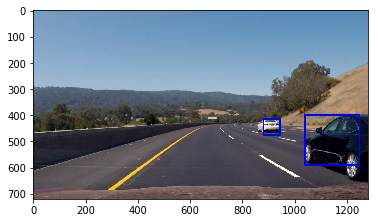

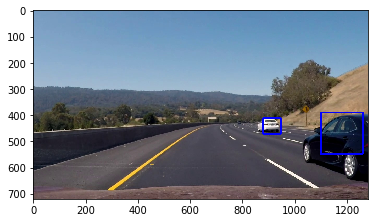

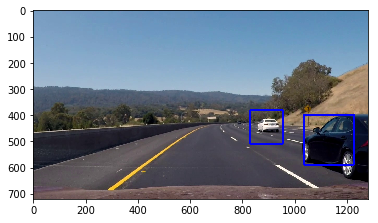

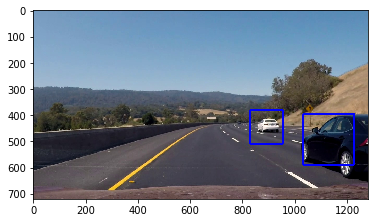

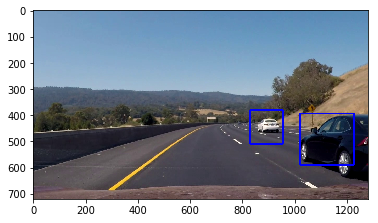

In [49]:
for i in range(710,715):
    print(i)
    image = mpimg.imread('image/'+str(i) + '.jpg')
    result = process_image(image)
    plt.figure()
    plt.imshow(result)

In [50]:
white_output = 'project_video_result.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)

clip1 = VideoFileClip("project_video.mp4")
location = queue.LifoQueue(maxsize = 2)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

'''

vc = cv2.VideoCapture("C:/Users/w2764/CarND-Vehicle-Detection-master/test_video.mp4")
c=1

if vc.isOpened(): #judge open
    rval , frame = vc.read()
    print(1)
else:
    rval = False

timeF = 1  #set frequence

while rval:   #loop read frame
    rval, frame = vc.read()
    #print(c)
    if(c%timeF == 0): #per time to operate
        print(c)
        #frame1 = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        #plt.figure()
        #plt.imshow(frame1)
        #result = process_image(np.array(frame1))result[:,:,::-1]
        cv2.imwrite('test_video/'+str(c) + '.jpg',frame) #save image
    c = c + 1
    cv2.waitKey(1)
vc.release()
'''


[]
[MoviePy] >>>> Building video project_video_result.mp4
[MoviePy] Writing video project_video_result.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  0%|                                                                               | 1/1261 [00:08<3:05:52,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  0%|▏                                                                              | 2/1261 [00:17<3:05:16,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  0%|▏                                                                              | 3/1261 [00:26<3:04:36,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  0%|▎                                                                              | 4/1261 [00:35<3:04:00,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  0%|▎                                                                              | 5/1261 [00:43<3:03:31,  8.77s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  0%|▍                                                                              | 6/1261 [00:52<3:03:27,  8.77s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▍                                                                              | 7/1261 [01:01<3:03:06,  8.76s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▌                                                                              | 8/1261 [01:10<3:02:44,  8.75s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▌                                                                              | 9/1261 [01:18<3:03:23,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▌                                                                             | 10/1261 [01:27<3:04:06,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▋                                                                             | 11/1261 [01:36<3:03:19,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▋                                                                             | 12/1261 [01:45<3:04:43,  8.87s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▊                                                                             | 13/1261 [01:54<3:05:09,  8.90s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▊                                                                             | 14/1261 [02:03<3:04:55,  8.90s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▉                                                                             | 15/1261 [02:12<3:05:04,  8.91s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|▉                                                                             | 16/1261 [02:21<3:05:24,  8.93s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|█                                                                             | 17/1261 [02:30<3:05:03,  8.93s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  1%|█                                                                             | 18/1261 [02:39<3:04:33,  8.91s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▏                                                                            | 19/1261 [02:48<3:03:47,  8.88s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▏                                                                            | 20/1261 [02:56<3:03:09,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▎                                                                            | 21/1261 [03:05<3:02:53,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▎                                                                            | 22/1261 [03:14<3:03:14,  8.87s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▍                                                                            | 23/1261 [03:23<3:02:42,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▍                                                                            | 24/1261 [03:32<3:03:40,  8.91s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▌                                                                            | 25/1261 [03:41<3:04:47,  8.97s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▌                                                                            | 26/1261 [03:50<3:03:36,  8.92s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▋                                                                            | 27/1261 [03:59<3:03:02,  8.90s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▋                                                                            | 28/1261 [04:07<3:01:52,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▊                                                                            | 29/1261 [04:16<3:01:35,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▊                                                                            | 30/1261 [04:25<3:01:54,  8.87s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  2%|█▉                                                                            | 31/1261 [04:34<3:01:57,  8.88s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|█▉                                                                            | 32/1261 [04:43<3:01:46,  8.87s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██                                                                            | 33/1261 [04:52<3:01:47,  8.88s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██                                                                            | 34/1261 [05:01<3:02:20,  8.92s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▏                                                                           | 35/1261 [05:10<3:01:45,  8.89s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▏                                                                           | 36/1261 [05:19<3:01:53,  8.91s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▎                                                                           | 37/1261 [05:28<3:01:27,  8.89s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▎                                                                           | 38/1261 [05:36<3:00:44,  8.87s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▍                                                                           | 39/1261 [05:45<3:00:53,  8.88s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▍                                                                           | 40/1261 [05:55<3:04:11,  9.05s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▌                                                                           | 41/1261 [06:04<3:03:25,  9.02s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▌                                                                           | 42/1261 [06:12<3:01:47,  8.95s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▋                                                                           | 43/1261 [06:21<3:00:39,  8.90s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  3%|██▋                                                                           | 44/1261 [06:30<2:59:26,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|██▊                                                                           | 45/1261 [06:39<2:58:47,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|██▊                                                                           | 46/1261 [06:47<2:58:10,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|██▉                                                                           | 47/1261 [06:56<2:57:59,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|██▉                                                                           | 48/1261 [07:05<2:57:20,  8.77s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███                                                                           | 49/1261 [07:14<2:57:07,  8.77s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███                                                                           | 50/1261 [07:22<2:57:01,  8.77s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███▏                                                                          | 51/1261 [07:31<2:56:36,  8.76s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███▏                                                                          | 52/1261 [07:40<2:56:47,  8.77s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███▎                                                                          | 53/1261 [07:49<2:57:16,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███▎                                                                          | 54/1261 [07:58<2:57:17,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███▍                                                                          | 55/1261 [08:06<2:56:48,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  4%|███▍                                                                          | 56/1261 [08:15<2:56:41,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▌                                                                          | 57/1261 [08:24<2:56:28,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▌                                                                          | 58/1261 [08:33<2:56:37,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▋                                                                          | 59/1261 [08:42<2:58:32,  8.91s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▋                                                                          | 60/1261 [08:51<2:59:28,  8.97s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▊                                                                          | 61/1261 [09:00<2:59:49,  8.99s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▊                                                                          | 62/1261 [09:10<3:02:01,  9.11s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▉                                                                          | 63/1261 [09:19<3:03:10,  9.17s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|███▉                                                                          | 64/1261 [09:28<3:02:26,  9.15s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|████                                                                          | 65/1261 [09:37<3:00:30,  9.06s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|████                                                                          | 66/1261 [09:46<2:59:52,  9.03s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|████▏                                                                         | 67/1261 [09:55<2:58:13,  8.96s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|████▏                                                                         | 68/1261 [10:03<2:57:33,  8.93s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  5%|████▎                                                                         | 69/1261 [10:12<2:56:32,  8.89s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▎                                                                         | 70/1261 [10:21<2:56:14,  8.88s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▍                                                                         | 71/1261 [10:30<2:56:19,  8.89s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▍                                                                         | 72/1261 [10:39<2:55:40,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▌                                                                         | 73/1261 [10:48<2:56:12,  8.90s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▌                                                                         | 74/1261 [10:57<2:55:39,  8.88s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▋                                                                         | 75/1261 [11:05<2:55:03,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▋                                                                         | 76/1261 [11:14<2:54:56,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▊                                                                         | 77/1261 [11:23<2:54:44,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▊                                                                         | 78/1261 [11:32<2:54:42,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▉                                                                         | 79/1261 [11:41<2:54:22,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|████▉                                                                         | 80/1261 [11:50<2:54:10,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  6%|█████                                                                         | 81/1261 [11:58<2:53:41,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████                                                                         | 82/1261 [12:07<2:53:23,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▏                                                                        | 83/1261 [12:16<2:53:28,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▏                                                                        | 84/1261 [12:25<2:52:54,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▎                                                                        | 85/1261 [12:34<2:52:46,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▎                                                                        | 86/1261 [12:43<2:52:59,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▍                                                                        | 87/1261 [12:51<2:52:37,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▍                                                                        | 88/1261 [13:00<2:52:50,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▌                                                                        | 89/1261 [13:09<2:52:32,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▌                                                                        | 90/1261 [13:18<2:52:35,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▋                                                                        | 91/1261 [13:27<2:52:25,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▋                                                                        | 92/1261 [13:36<2:52:24,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▊                                                                        | 93/1261 [13:45<2:52:21,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  7%|█████▊                                                                        | 94/1261 [13:53<2:52:01,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|█████▉                                                                        | 95/1261 [14:02<2:51:51,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|█████▉                                                                        | 96/1261 [14:11<2:51:35,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████                                                                        | 97/1261 [14:20<2:51:15,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████                                                                        | 98/1261 [14:29<2:51:04,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████                                                                        | 99/1261 [14:37<2:50:54,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████                                                                       | 100/1261 [14:46<2:50:55,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████▏                                                                      | 101/1261 [14:55<2:50:53,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████▏                                                                      | 102/1261 [15:04<2:50:19,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████▎                                                                      | 103/1261 [15:13<2:50:14,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████▎                                                                      | 104/1261 [15:22<2:49:58,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████▍                                                                      | 105/1261 [15:30<2:50:06,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████▍                                                                      | 106/1261 [15:39<2:50:09,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  8%|██████▌                                                                      | 107/1261 [15:48<2:50:04,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|██████▌                                                                      | 108/1261 [15:57<2:49:55,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|██████▋                                                                      | 109/1261 [16:06<2:49:24,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|██████▋                                                                      | 110/1261 [16:15<2:49:24,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|██████▊                                                                      | 111/1261 [16:24<2:49:27,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|██████▊                                                                      | 112/1261 [16:32<2:48:47,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|██████▉                                                                      | 113/1261 [16:41<2:48:29,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|██████▉                                                                      | 114/1261 [16:50<2:48:14,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|███████                                                                      | 115/1261 [16:59<2:49:16,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|███████                                                                      | 116/1261 [17:08<2:51:47,  9.00s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|███████▏                                                                     | 117/1261 [17:17<2:50:33,  8.95s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|███████▏                                                                     | 118/1261 [17:26<2:49:24,  8.89s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


  9%|███████▎                                                                     | 119/1261 [17:35<2:49:04,  8.88s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▎                                                                     | 120/1261 [17:43<2:48:42,  8.87s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▍                                                                     | 121/1261 [17:52<2:48:18,  8.86s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▍                                                                     | 122/1261 [18:01<2:47:38,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▌                                                                     | 123/1261 [18:10<2:47:22,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▌                                                                     | 124/1261 [18:19<2:47:34,  8.84s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▋                                                                     | 125/1261 [18:28<2:47:02,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▋                                                                     | 126/1261 [18:36<2:46:43,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▊                                                                     | 127/1261 [18:45<2:46:28,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▊                                                                     | 128/1261 [18:54<2:46:16,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▉                                                                     | 129/1261 [19:03<2:46:36,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▉                                                                     | 130/1261 [19:12<2:46:30,  8.83s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|███████▉                                                                     | 131/1261 [19:21<2:48:07,  8.93s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 10%|████████                                                                     | 132/1261 [19:30<2:47:43,  8.91s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████                                                                     | 133/1261 [19:38<2:46:47,  8.87s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▏                                                                    | 134/1261 [19:47<2:46:17,  8.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▏                                                                    | 135/1261 [19:56<2:45:36,  8.82s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▎                                                                    | 136/1261 [20:05<2:45:06,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▎                                                                    | 137/1261 [20:14<2:44:40,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▍                                                                    | 138/1261 [20:22<2:44:34,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▍                                                                    | 139/1261 [20:31<2:44:22,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▌                                                                    | 140/1261 [20:40<2:43:57,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▌                                                                    | 141/1261 [20:49<2:44:13,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▋                                                                    | 142/1261 [20:57<2:43:48,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▋                                                                    | 143/1261 [21:06<2:43:33,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▊                                                                    | 144/1261 [21:15<2:43:48,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 11%|████████▊                                                                    | 145/1261 [21:24<2:43:17,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|████████▉                                                                    | 146/1261 [21:33<2:43:33,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|████████▉                                                                    | 147/1261 [21:41<2:43:30,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████                                                                    | 148/1261 [21:50<2:43:16,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████                                                                    | 149/1261 [21:59<2:42:55,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▏                                                                   | 150/1261 [22:08<2:42:50,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▏                                                                   | 151/1261 [22:17<2:42:39,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▎                                                                   | 152/1261 [22:25<2:42:12,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▎                                                                   | 153/1261 [22:34<2:42:23,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▍                                                                   | 154/1261 [22:43<2:41:57,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▍                                                                   | 155/1261 [22:52<2:42:04,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▌                                                                   | 156/1261 [23:01<2:41:50,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 12%|█████████▌                                                                   | 157/1261 [23:09<2:41:10,  8.76s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|█████████▋                                                                   | 158/1261 [23:18<2:41:33,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|█████████▋                                                                   | 159/1261 [23:27<2:41:13,  8.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|█████████▊                                                                   | 160/1261 [23:36<2:41:32,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|█████████▊                                                                   | 161/1261 [23:44<2:41:20,  8.80s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|█████████▉                                                                   | 162/1261 [23:53<2:41:00,  8.79s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|█████████▉                                                                   | 163/1261 [24:02<2:41:13,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|██████████                                                                   | 164/1261 [24:11<2:41:06,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|██████████                                                                   | 165/1261 [24:20<2:40:57,  8.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|██████████▏                                                                  | 166/1261 [24:29<2:41:39,  8.86s/it]

((1148, 414), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|██████████▏                                                                  | 167/1261 [24:38<2:44:29,  9.02s/it]

((1144, 396), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|██████████▎                                                                  | 168/1261 [24:48<2:47:42,  9.21s/it]

((1100, 390), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|██████████▎                                                                  | 169/1261 [24:58<2:51:49,  9.44s/it]

((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 13%|██████████▍                                                                  | 170/1261 [25:08<2:55:01,  9.63s/it]

((1100, 370), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▍                                                                  | 171/1261 [25:18<2:58:09,  9.81s/it]

((1100, 360), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▌                                                                  | 172/1261 [25:28<3:00:25,  9.94s/it]

((1100, 390), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▌                                                                  | 173/1261 [25:38<3:00:27,  9.95s/it]

((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▌                                                                  | 174/1261 [25:48<3:01:22, 10.01s/it]

((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▋                                                                  | 175/1261 [25:59<3:02:37, 10.09s/it]

((1084, 380), (1279, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▋                                                                  | 176/1261 [26:10<3:07:23, 10.36s/it]

((1080, 370), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▊                                                                  | 177/1261 [26:20<3:09:42, 10.50s/it]

((1100, 390), (1259, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▊                                                                  | 178/1261 [26:31<3:07:14, 10.37s/it]

((1096, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▉                                                                  | 179/1261 [26:41<3:05:53, 10.31s/it]

((1092, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|██████████▉                                                                  | 180/1261 [26:51<3:05:27, 10.29s/it]

((1088, 380), (1279, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|███████████                                                                  | 181/1261 [27:01<3:06:26, 10.36s/it]

((1084, 378), (1275, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 14%|███████████                                                                  | 182/1261 [27:12<3:07:01, 10.40s/it]

((1080, 368), (1271, 567))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▏                                                                 | 183/1261 [27:23<3:07:33, 10.44s/it]

((1100, 390), (1259, 557))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▏                                                                 | 184/1261 [27:33<3:05:36, 10.34s/it]

((1080, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▎                                                                 | 185/1261 [27:43<3:04:34, 10.29s/it]

((1076, 378), (1267, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▎                                                                 | 186/1261 [27:53<3:05:54, 10.38s/it]

((1096, 390), (1259, 567))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▍                                                                 | 187/1261 [28:03<3:03:26, 10.25s/it]

((1060, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▍                                                                 | 188/1261 [28:14<3:07:13, 10.47s/it]

((1056, 378), (1259, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▌                                                                 | 189/1261 [28:25<3:09:52, 10.63s/it]

((1060, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▌                                                                 | 190/1261 [28:36<3:09:14, 10.60s/it]

((1056, 380), (1259, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▋                                                                 | 191/1261 [28:47<3:10:44, 10.70s/it]

((1052, 370), (1259, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▋                                                                 | 192/1261 [28:58<3:11:27, 10.75s/it]

((1060, 390), (1259, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▊                                                                 | 193/1261 [29:08<3:09:38, 10.65s/it]

((1056, 350), (1275, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▊                                                                 | 194/1261 [29:19<3:12:46, 10.84s/it]

((1060, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 15%|███████████▉                                                                 | 195/1261 [29:30<3:10:34, 10.73s/it]

((1056, 378), (1259, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|███████████▉                                                                 | 196/1261 [29:41<3:11:24, 10.78s/it]

((1060, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████                                                                 | 197/1261 [29:51<3:09:47, 10.70s/it]

((1056, 380), (1259, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████                                                                 | 198/1261 [30:02<3:10:43, 10.77s/it]

((1060, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▏                                                                | 199/1261 [30:13<3:09:39, 10.72s/it]

((1060, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▏                                                                | 200/1261 [30:23<3:08:09, 10.64s/it]

((1056, 378), (1259, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▎                                                                | 201/1261 [30:34<3:09:34, 10.73s/it]

((1060, 390), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▎                                                                | 202/1261 [30:45<3:08:05, 10.66s/it]

((1060, 380), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▍                                                                | 203/1261 [30:55<3:07:17, 10.62s/it]

((1056, 378), (1247, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▍                                                                | 204/1261 [31:06<3:08:23, 10.69s/it]

((1052, 376), (1259, 567))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▌                                                                | 205/1261 [31:17<3:09:24, 10.76s/it]

((1060, 390), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▌                                                                | 206/1261 [31:27<3:07:50, 10.68s/it]

((1040, 380), (1279, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▋                                                                | 207/1261 [31:38<3:09:14, 10.77s/it]

((1060, 370), (1275, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 16%|████████████▋                                                                | 208/1261 [31:49<3:09:33, 10.80s/it]

((1040, 368), (1247, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|████████████▊                                                                | 209/1261 [32:00<3:09:59, 10.84s/it]

((1060, 390), (1219, 557))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|████████████▊                                                                | 210/1261 [32:11<3:08:13, 10.75s/it]

((1040, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|████████████▉                                                                | 211/1261 [32:21<3:06:54, 10.68s/it]

((1036, 370), (1275, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|████████████▉                                                                | 212/1261 [32:32<3:08:22, 10.77s/it]

((1060, 368), (1271, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████                                                                | 213/1261 [32:43<3:08:50, 10.81s/it]

((1056, 366), (1279, 557))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████                                                                | 214/1261 [32:54<3:08:59, 10.83s/it]

((1036, 364), (1275, 555))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████▏                                                               | 215/1261 [33:05<3:09:38, 10.88s/it]

((1056, 390), (1219, 553))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████▏                                                               | 216/1261 [33:16<3:07:21, 10.76s/it]

((1036, 380), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████▎                                                               | 217/1261 [33:26<3:06:09, 10.70s/it]

((1032, 370), (1271, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████▎                                                               | 218/1261 [33:37<3:07:30, 10.79s/it]

((1060, 368), (1267, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████▎                                                               | 219/1261 [33:48<3:07:52, 10.82s/it]

((1040, 366), (1247, 557))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 17%|█████████████▍                                                               | 220/1261 [33:59<3:08:23, 10.86s/it]

((1036, 364), (1227, 555))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▍                                                               | 221/1261 [34:10<3:08:52, 10.90s/it]

((1056, 390), (1219, 553))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▌                                                               | 222/1261 [34:20<3:06:28, 10.77s/it]

((1036, 380), (1235, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▌                                                               | 223/1261 [34:31<3:04:54, 10.69s/it]

((1032, 370), (1223, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▋                                                               | 224/1261 [34:42<3:06:00, 10.76s/it]

((1060, 384), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▋                                                               | 225/1261 [34:52<3:04:28, 10.68s/it]

((1040, 374), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▊                                                               | 226/1261 [35:03<3:03:18, 10.63s/it]

((1036, 372), (1259, 563))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▊                                                               | 227/1261 [35:14<3:05:00, 10.74s/it]

((1032, 370), (1223, 561))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▉                                                               | 228/1261 [35:25<3:06:06, 10.81s/it]

((1060, 390), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|█████████████▉                                                               | 229/1261 [35:35<3:04:31, 10.73s/it]

((1040, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|██████████████                                                               | 230/1261 [35:46<3:03:31, 10.68s/it]

((1020, 378), (1259, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|██████████████                                                               | 231/1261 [35:57<3:06:38, 10.87s/it]

((1020, 368), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|██████████████▏                                                              | 232/1261 [36:08<3:06:36, 10.88s/it]

((1020, 390), (1279, 557))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 18%|██████████████▏                                                              | 233/1261 [36:19<3:05:51, 10.85s/it]

((1020, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▎                                                              | 234/1261 [36:30<3:05:21, 10.83s/it]

((1020, 370), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▎                                                              | 235/1261 [36:40<3:04:36, 10.80s/it]

((1020, 384), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▍                                                              | 236/1261 [36:51<3:04:20, 10.79s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▍                                                              | 237/1261 [37:02<3:06:42, 10.94s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▌                                                              | 238/1261 [37:14<3:08:13, 11.04s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▌                                                              | 239/1261 [37:25<3:09:14, 11.11s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▋                                                              | 240/1261 [37:36<3:09:59, 11.16s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▋                                                              | 241/1261 [37:48<3:10:10, 11.19s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▊                                                              | 242/1261 [37:59<3:10:07, 11.19s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▊                                                              | 243/1261 [38:10<3:10:16, 11.21s/it]

((1020, 348), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▉                                                              | 244/1261 [38:21<3:10:30, 11.24s/it]

((1020, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 19%|██████████████▉                                                              | 245/1261 [38:33<3:10:27, 11.25s/it]

((1016, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████                                                              | 246/1261 [38:44<3:10:14, 11.25s/it]

((1020, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████                                                              | 247/1261 [38:55<3:10:03, 11.25s/it]

((1016, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▏                                                             | 248/1261 [39:06<3:09:09, 11.20s/it]

((1020, 348), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▏                                                             | 249/1261 [39:17<3:08:45, 11.19s/it]

((1000, 346), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▎                                                             | 250/1261 [39:29<3:08:33, 11.19s/it]

((1020, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▎                                                             | 251/1261 [39:40<3:08:01, 11.17s/it]

((1000, 348), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▍                                                             | 252/1261 [39:51<3:07:36, 11.16s/it]

((1020, 346), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▍                                                             | 253/1261 [40:02<3:07:25, 11.16s/it]

((1000, 344), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▌                                                             | 254/1261 [40:13<3:07:12, 11.15s/it]

((1020, 342), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▌                                                             | 255/1261 [40:25<3:10:38, 11.37s/it]

((1000, 340), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▋                                                             | 256/1261 [40:37<3:14:17, 11.60s/it]

((1020, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▋                                                             | 257/1261 [40:49<3:17:11, 11.78s/it]

((1000, 348), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 20%|███████████████▊                                                             | 258/1261 [41:02<3:19:47, 11.95s/it]

((1020, 346), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|███████████████▊                                                             | 259/1261 [41:13<3:18:25, 11.88s/it]

((1000, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|███████████████▉                                                             | 260/1261 [41:25<3:18:16, 11.89s/it]

((1020, 348), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|███████████████▉                                                             | 261/1261 [41:37<3:17:16, 11.84s/it]

((1016, 346), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|███████████████▉                                                             | 262/1261 [41:48<3:15:07, 11.72s/it]

((1012, 344), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████                                                             | 263/1261 [42:00<3:13:15, 11.62s/it]

((992, 342), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████                                                             | 264/1261 [42:12<3:13:44, 11.66s/it]

((1012, 340), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████▏                                                            | 265/1261 [42:23<3:12:26, 11.59s/it]

((1008, 338), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████▏                                                            | 266/1261 [42:34<3:11:25, 11.54s/it]

((988, 336), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████▎                                                            | 267/1261 [42:46<3:11:44, 11.57s/it]

((984, 334), (1275, 573))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████▎                                                            | 268/1261 [42:58<3:14:47, 11.77s/it]

((1012, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████▍                                                            | 269/1261 [43:10<3:12:39, 11.65s/it]

((992, 348), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████▍                                                            | 270/1261 [43:21<3:12:49, 11.67s/it]

((1012, 346), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 21%|████████████████▌                                                            | 271/1261 [43:33<3:11:20, 11.60s/it]

((1008, 344), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|████████████████▌                                                            | 272/1261 [43:44<3:10:18, 11.55s/it]

((1004, 342), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|████████████████▋                                                            | 273/1261 [43:56<3:09:44, 11.52s/it]

((1020, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|████████████████▋                                                            | 274/1261 [44:07<3:09:04, 11.49s/it]

((1000, 348), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|████████████████▊                                                            | 275/1261 [44:19<3:08:31, 11.47s/it]

((1020, 346), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|████████████████▊                                                            | 276/1261 [44:30<3:07:59, 11.45s/it]

((1000, 344), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|████████████████▉                                                            | 277/1261 [44:41<3:07:34, 11.44s/it]

((996, 342), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|████████████████▉                                                            | 278/1261 [44:53<3:08:27, 11.50s/it]

((980, 340), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|█████████████████                                                            | 279/1261 [45:05<3:09:33, 11.58s/it]

((980, 338), (1279, 577))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|█████████████████                                                            | 280/1261 [45:17<3:13:20, 11.83s/it]

((980, 350), (1279, 575))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|█████████████████▏                                                           | 281/1261 [45:29<3:15:17, 11.96s/it]

((980, 348), (1279, 587))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|█████████████████▏                                                           | 282/1261 [45:42<3:17:20, 12.09s/it]

((1000, 346), (1279, 585))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 22%|█████████████████▎                                                           | 283/1261 [45:54<3:16:28, 12.05s/it]

((980, 350), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▎                                                           | 284/1261 [46:06<3:14:48, 11.96s/it]

((980, 348), (1263, 587))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▍                                                           | 285/1261 [46:18<3:16:36, 12.09s/it]

((980, 350), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▍                                                           | 286/1261 [46:30<3:14:51, 11.99s/it]

((980, 348), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▌                                                           | 287/1261 [46:41<3:13:31, 11.92s/it]

((980, 346), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▌                                                           | 288/1261 [46:53<3:12:43, 11.88s/it]

((980, 350), (1263, 583))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▋                                                           | 289/1261 [47:06<3:14:17, 11.99s/it]

((980, 350), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▋                                                           | 290/1261 [47:17<3:13:04, 11.93s/it]

((980, 348), (1279, 587))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▊                                                           | 291/1261 [47:30<3:15:06, 12.07s/it]

((980, 350), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▊                                                           | 292/1261 [47:41<3:13:35, 11.99s/it]

((980, 348), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▉                                                           | 293/1261 [47:53<3:12:26, 11.93s/it]

((980, 346), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|█████████████████▉                                                           | 294/1261 [48:05<3:11:55, 11.91s/it]

((980, 350), (1263, 583))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|██████████████████                                                           | 295/1261 [48:17<3:13:14, 12.00s/it]

((980, 348), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 23%|██████████████████                                                           | 296/1261 [48:29<3:12:26, 11.97s/it]

((980, 346), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▏                                                          | 297/1261 [48:41<3:11:20, 11.91s/it]

((980, 344), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▏                                                          | 298/1261 [48:53<3:10:42, 11.88s/it]

((980, 342), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▎                                                          | 299/1261 [49:05<3:09:55, 11.85s/it]

((980, 340), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▎                                                          | 300/1261 [49:16<3:09:12, 11.81s/it]

((980, 350), (1263, 577))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▍                                                          | 301/1261 [49:29<3:11:09, 11.95s/it]

((976, 348), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▍                                                          | 302/1261 [49:40<3:10:08, 11.90s/it]

((980, 346), (1243, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▌                                                          | 303/1261 [49:52<3:09:08, 11.85s/it]

((976, 344), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▌                                                          | 304/1261 [50:04<3:08:20, 11.81s/it]

((980, 342), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▌                                                          | 305/1261 [50:16<3:07:44, 11.78s/it]

((980, 340), (1239, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▋                                                          | 306/1261 [50:28<3:10:02, 11.94s/it]

((980, 350), (1239, 577))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▋                                                          | 307/1261 [50:40<3:11:18, 12.03s/it]

((976, 348), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 24%|██████████████████▊                                                          | 308/1261 [50:52<3:10:12, 11.98s/it]

((980, 346), (1235, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|██████████████████▊                                                          | 309/1261 [51:04<3:08:58, 11.91s/it]

((976, 344), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|██████████████████▉                                                          | 310/1261 [51:15<3:08:14, 11.88s/it]

((980, 342), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|██████████████████▉                                                          | 311/1261 [51:27<3:07:44, 11.86s/it]

((980, 350), (1239, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████                                                          | 312/1261 [51:40<3:09:11, 11.96s/it]

((976, 348), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████                                                          | 313/1261 [51:51<3:08:15, 11.91s/it]

((980, 346), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▏                                                         | 314/1261 [52:03<3:07:32, 11.88s/it]

((980, 350), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▏                                                         | 315/1261 [52:15<3:06:49, 11.85s/it]

((976, 348), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▎                                                         | 316/1261 [52:27<3:06:24, 11.84s/it]

((980, 346), (1235, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▎                                                         | 317/1261 [52:38<3:05:54, 11.82s/it]

((976, 344), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▍                                                         | 318/1261 [52:50<3:05:30, 11.80s/it]

((972, 342), (1235, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▍                                                         | 319/1261 [53:02<3:05:16, 11.80s/it]

((980, 340), (1231, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▌                                                         | 320/1261 [53:14<3:07:34, 11.96s/it]

((980, 350), (1239, 577))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 25%|███████████████████▌                                                         | 321/1261 [53:27<3:08:50, 12.05s/it]

((960, 348), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|███████████████████▋                                                         | 322/1261 [53:39<3:07:59, 12.01s/it]

((980, 346), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|███████████████████▋                                                         | 323/1261 [53:50<3:06:51, 11.95s/it]

((976, 344), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|███████████████████▊                                                         | 324/1261 [54:02<3:05:35, 11.88s/it]

((980, 342), (1235, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|███████████████████▊                                                         | 325/1261 [54:14<3:04:52, 11.85s/it]

((980, 350), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|███████████████████▉                                                         | 326/1261 [54:26<3:04:07, 11.82s/it]

((976, 348), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|███████████████████▉                                                         | 327/1261 [54:37<3:03:44, 11.80s/it]

((980, 346), (1235, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|████████████████████                                                         | 328/1261 [54:49<3:03:18, 11.79s/it]

((980, 344), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|████████████████████                                                         | 329/1261 [55:01<3:02:54, 11.78s/it]

((980, 342), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|████████████████████▏                                                        | 330/1261 [55:13<3:03:02, 11.80s/it]

((988, 340), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|████████████████████▏                                                        | 331/1261 [55:24<3:02:21, 11.76s/it]

((988, 350), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|████████████████████▎                                                        | 332/1261 [55:36<3:01:49, 11.74s/it]

((968, 348), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|████████████████████▎                                                        | 333/1261 [55:48<3:01:39, 11.75s/it]

((980, 350), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 26%|████████████████████▍                                                        | 334/1261 [56:00<3:01:55, 11.77s/it]

((976, 348), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▍                                                        | 335/1261 [56:11<3:01:44, 11.78s/it]

((980, 346), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▌                                                        | 336/1261 [56:23<3:01:32, 11.78s/it]

((960, 344), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▌                                                        | 337/1261 [56:35<3:02:03, 11.82s/it]

((980, 342), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▋                                                        | 338/1261 [56:47<3:01:39, 11.81s/it]

((976, 340), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▋                                                        | 339/1261 [56:59<3:01:16, 11.80s/it]

((980, 350), (1195, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▊                                                        | 340/1261 [57:10<3:00:54, 11.79s/it]

((960, 348), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▊                                                        | 341/1261 [57:22<3:01:19, 11.83s/it]

((980, 346), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▉                                                        | 342/1261 [57:34<3:00:56, 11.81s/it]

((976, 344), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|████████████████████▉                                                        | 343/1261 [57:46<3:00:27, 11.79s/it]

((972, 342), (1227, 581))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|█████████████████████                                                        | 344/1261 [57:58<3:02:53, 11.97s/it]

((980, 340), (1231, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|█████████████████████                                                        | 345/1261 [58:10<3:01:45, 11.91s/it]

((960, 338), (1239, 577))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 27%|█████████████████████▏                                                       | 346/1261 [58:23<3:04:27, 12.10s/it]

((980, 350), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▏                                                       | 347/1261 [58:34<3:02:56, 12.01s/it]

((960, 348), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▏                                                       | 348/1261 [58:46<3:02:29, 11.99s/it]

((980, 346), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▎                                                       | 349/1261 [58:58<3:01:13, 11.92s/it]

((960, 344), (1199, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▎                                                       | 350/1261 [59:10<3:01:08, 11.93s/it]

((980, 342), (1195, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▍                                                       | 351/1261 [59:22<3:00:16, 11.89s/it]

((976, 340), (1215, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▍                                                       | 352/1261 [59:34<2:59:38, 11.86s/it]

((972, 338), (1195, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▌                                                       | 353/1261 [59:45<2:58:55, 11.82s/it]

((968, 336), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▌                                                       | 354/1261 [59:57<2:58:26, 11.80s/it]

((980, 350), (1187, 565))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████                                                      | 355/1261 [1:00:09<2:58:01, 11.79s/it]

((976, 348), (1215, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▏                                                     | 356/1261 [1:00:21<2:57:30, 11.77s/it]

((956, 346), (1211, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▏                                                     | 357/1261 [1:00:33<2:58:04, 11.82s/it]

((976, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▎                                                     | 358/1261 [1:01:08<4:46:10, 19.01s/it]

((980, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 28%|█████████████████████▎                                                     | 359/1261 [1:01:44<5:58:43, 23.86s/it]

((980, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▍                                                     | 360/1261 [1:02:19<6:48:35, 27.21s/it]

((980, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▍                                                     | 361/1261 [1:02:53<7:22:53, 29.53s/it]

((988, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▌                                                     | 362/1261 [1:03:28<7:46:51, 31.16s/it]

((988, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▌                                                     | 363/1261 [1:04:03<8:03:08, 32.28s/it]

((988, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▋                                                     | 364/1261 [1:04:38<8:14:31, 33.08s/it]

((988, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▋                                                     | 365/1261 [1:05:13<8:22:11, 33.63s/it]

((980, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▊                                                     | 366/1261 [1:05:48<8:27:59, 34.06s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▊                                                     | 367/1261 [1:06:26<8:45:00, 35.24s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▉                                                     | 368/1261 [1:07:05<9:00:09, 36.29s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|█████████████████████▉                                                     | 369/1261 [1:07:43<9:06:56, 36.79s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|██████████████████████                                                     | 370/1261 [1:08:21<9:11:24, 37.13s/it]

((980, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 29%|██████████████████████                                                     | 371/1261 [1:08:56<9:01:32, 36.51s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▏                                                    | 372/1261 [1:09:34<9:07:10, 36.93s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▏                                                    | 373/1261 [1:10:12<9:10:44, 37.21s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▏                                                    | 374/1261 [1:10:50<9:12:45, 37.39s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▎                                                    | 375/1261 [1:11:28<9:14:51, 37.58s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▎                                                    | 376/1261 [1:12:05<9:15:51, 37.69s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▍                                                    | 377/1261 [1:12:43<9:16:17, 37.76s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▍                                                    | 378/1261 [1:13:21<9:16:15, 37.80s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▌                                                    | 379/1261 [1:13:59<9:16:32, 37.86s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▌                                                    | 380/1261 [1:14:37<9:16:51, 37.92s/it]

((940, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▋                                                    | 381/1261 [1:15:13<9:07:08, 37.31s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▋                                                    | 382/1261 [1:15:51<9:09:39, 37.52s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▊                                                    | 383/1261 [1:16:29<9:11:35, 37.69s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 30%|██████████████████████▊                                                    | 384/1261 [1:17:07<9:12:36, 37.81s/it]

((940, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|██████████████████████▉                                                    | 385/1261 [1:17:46<9:13:15, 37.89s/it]

((940, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|██████████████████████▉                                                    | 386/1261 [1:18:21<9:00:41, 37.08s/it]

((940, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████                                                    | 387/1261 [1:18:56<8:51:43, 36.50s/it]

((940, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████                                                    | 388/1261 [1:19:31<8:45:03, 36.09s/it]

((940, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▏                                                   | 389/1261 [1:20:06<8:40:12, 35.79s/it]

((940, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▏                                                   | 390/1261 [1:20:41<8:36:12, 35.56s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▎                                                   | 391/1261 [1:21:16<8:33:34, 35.42s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▎                                                   | 392/1261 [1:21:51<8:31:10, 35.29s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▎                                                   | 393/1261 [1:22:26<8:29:20, 35.21s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▍                                                   | 394/1261 [1:23:01<8:27:40, 35.13s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▍                                                   | 395/1261 [1:23:36<8:26:28, 35.09s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▌                                                   | 396/1261 [1:24:11<8:25:00, 35.03s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 31%|███████████████████████▌                                                   | 397/1261 [1:24:46<8:23:37, 34.97s/it]

((940, 350), (1099, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|███████████████████████▋                                                   | 398/1261 [1:25:18<8:10:36, 34.11s/it]

((940, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|███████████████████████▋                                                   | 399/1261 [1:25:53<8:13:34, 34.36s/it]

((940, 350), (1131, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|███████████████████████▊                                                   | 400/1261 [1:26:28<8:15:21, 34.52s/it]

((892, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|███████████████████████▊                                                   | 401/1261 [1:27:06<8:29:02, 35.51s/it]

((892, 350), (1131, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|███████████████████████▉                                                   | 402/1261 [1:27:43<8:38:04, 36.19s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|███████████████████████▉                                                   | 403/1261 [1:28:18<8:32:09, 35.82s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|████████████████████████                                                   | 404/1261 [1:28:54<8:30:14, 35.72s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|████████████████████████                                                   | 405/1261 [1:29:29<8:26:12, 35.48s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|████████████████████████▏                                                  | 406/1261 [1:30:04<8:23:43, 35.35s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|████████████████████████▏                                                  | 407/1261 [1:30:39<8:21:31, 35.24s/it]

((956, 382), (1083, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|████████████████████████▎                                                  | 408/1261 [1:31:00<7:21:32, 31.06s/it]

((933, 382), (1083, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 32%|████████████████████████▎                                                  | 409/1261 [1:31:22<6:43:19, 28.40s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▍                                                  | 410/1261 [1:31:57<7:10:29, 30.35s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▍                                                  | 411/1261 [1:32:32<7:29:23, 31.72s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▌                                                  | 412/1261 [1:33:07<7:42:23, 32.68s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▌                                                  | 413/1261 [1:33:42<7:51:25, 33.35s/it]

((924, 382), (1083, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▌                                                  | 414/1261 [1:34:05<7:05:24, 30.14s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▋                                                  | 415/1261 [1:34:41<7:29:23, 31.87s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▋                                                  | 416/1261 [1:35:15<7:40:14, 32.68s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▊                                                  | 417/1261 [1:35:49<7:46:46, 33.18s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▊                                                  | 418/1261 [1:36:24<7:51:32, 33.56s/it]

((892, 350), (1131, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▉                                                  | 419/1261 [1:37:01<8:05:57, 34.63s/it]

((922, 382), (1083, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|████████████████████████▉                                                  | 420/1261 [1:37:23<7:13:11, 30.91s/it]

((921, 350), (1099, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|█████████████████████████                                                  | 421/1261 [1:37:52<7:05:50, 30.42s/it]

((900, 350), (1059, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 33%|█████████████████████████                                                  | 422/1261 [1:38:20<6:55:04, 29.68s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▏                                                 | 423/1261 [1:38:55<7:14:39, 31.12s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▏                                                 | 424/1261 [1:39:29<7:27:58, 32.11s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▎                                                 | 425/1261 [1:40:04<7:36:23, 32.75s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▎                                                 | 426/1261 [1:40:38<7:42:18, 33.22s/it]

((900, 350), (1059, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▍                                                 | 427/1261 [1:41:06<7:20:10, 31.67s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▍                                                 | 428/1261 [1:41:40<7:30:45, 32.47s/it]

((892, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▌                                                 | 429/1261 [1:42:15<7:37:37, 33.00s/it]

((912, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▌                                                 | 430/1261 [1:42:36<6:48:33, 29.50s/it]

((911, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▋                                                 | 431/1261 [1:42:57<6:15:08, 27.12s/it]

((910, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▋                                                 | 432/1261 [1:43:19<5:51:37, 25.45s/it]

((909, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▊                                                 | 433/1261 [1:43:41<5:35:19, 24.30s/it]

((908, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▊                                                 | 434/1261 [1:44:02<5:23:14, 23.45s/it]

((924, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 34%|█████████████████████████▊                                                 | 435/1261 [1:44:23<5:12:21, 22.69s/it]

((900, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|█████████████████████████▉                                                 | 436/1261 [1:44:55<5:48:46, 25.37s/it]

((900, 350), (1059, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|█████████████████████████▉                                                 | 437/1261 [1:45:23<5:59:21, 26.17s/it]

((924, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████                                                 | 438/1261 [1:45:44<5:37:19, 24.59s/it]

((912, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████                                                 | 439/1261 [1:46:05<5:23:57, 23.65s/it]

((911, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▏                                                | 440/1261 [1:46:26<5:14:09, 22.96s/it]

((910, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▏                                                | 441/1261 [1:46:48<5:07:04, 22.47s/it]

((909, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▎                                                | 442/1261 [1:47:09<5:02:04, 22.13s/it]

((908, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▎                                                | 443/1261 [1:47:30<4:58:49, 21.92s/it]

((892, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▍                                                | 444/1261 [1:48:05<5:49:17, 25.65s/it]

((892, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▍                                                | 445/1261 [1:48:39<6:24:55, 28.30s/it]

((892, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▌                                                | 446/1261 [1:49:14<6:48:56, 30.11s/it]

((900, 382), (1059, 549))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 35%|██████████████████████████▌                                                | 447/1261 [1:49:39<6:29:36, 28.72s/it]

((924, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|██████████████████████████▋                                                | 448/1261 [1:50:00<5:57:09, 26.36s/it]

((924, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|██████████████████████████▋                                                | 449/1261 [1:50:21<5:35:22, 24.78s/it]

((901, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|██████████████████████████▊                                                | 450/1261 [1:50:43<5:23:31, 23.94s/it]

((867, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|██████████████████████████▊                                                | 451/1261 [1:51:06<5:20:30, 23.74s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|██████████████████████████▉                                                | 452/1261 [1:51:41<6:03:54, 26.99s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|██████████████████████████▉                                                | 453/1261 [1:52:15<6:33:36, 29.23s/it]

((902, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|███████████████████████████                                                | 454/1261 [1:52:37<6:03:28, 27.02s/it]

((901, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|███████████████████████████                                                | 455/1261 [1:52:59<5:42:12, 25.47s/it]

((900, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|███████████████████████████                                                | 456/1261 [1:53:21<5:27:04, 24.38s/it]

((820, 350), (1051, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|███████████████████████████▏                                               | 457/1261 [1:53:54<6:01:15, 26.96s/it]

((910, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|███████████████████████████▏                                               | 458/1261 [1:54:15<5:38:27, 25.29s/it]

((976, 409), (1019, 452))
scale:0.7479166666666667
((898, 431), (941, 474))
scale:0.79375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|███████████████████████████▎                                               | 459/1261 [1:54:31<5:01:07, 22.53s/it]

((899, 430), (948, 488))
scale:0.7916666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 36%|███████████████████████████▎                                               | 460/1261 [1:54:44<4:21:23, 19.58s/it]

((900, 430), (949, 479))
scale:0.7916666666666666
((976, 430), (1025, 479))
scale:0.7916666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▍                                               | 461/1261 [1:55:00<4:06:19, 18.47s/it]

((901, 430), (950, 479))
scale:0.7916666666666666
((977, 430), (1026, 479))
scale:0.7916666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▍                                               | 462/1261 [1:55:16<3:55:29, 17.68s/it]

((965, 418), (1027, 479))
scale:0.7666666666666667
((902, 430), (951, 479))
scale:0.7916666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▌                                               | 463/1261 [1:55:33<3:53:41, 17.57s/it]

((966, 417), (1028, 479))
scale:0.7645833333333333
((901, 429), (952, 479))
scale:0.7895833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▌                                               | 464/1261 [1:55:50<3:52:22, 17.49s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▋                                               | 465/1261 [1:56:25<4:59:14, 22.56s/it]

((844, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▋                                               | 466/1261 [1:57:02<5:57:21, 26.97s/it]

((860, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▊                                               | 467/1261 [1:57:39<6:35:21, 29.88s/it]

((870, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▊                                               | 468/1261 [1:58:15<6:58:34, 31.67s/it]

((870, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▉                                               | 469/1261 [1:58:51<7:15:52, 33.02s/it]

((844, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|███████████████████████████▉                                               | 470/1261 [1:59:28<7:32:16, 34.31s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|████████████████████████████                                               | 471/1261 [2:00:02<7:32:18, 34.35s/it]

((872, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 37%|████████████████████████████                                               | 472/1261 [2:00:38<7:37:31, 34.79s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▏                                              | 473/1261 [2:01:13<7:35:31, 34.68s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▏                                              | 474/1261 [2:01:47<7:34:28, 34.65s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▎                                              | 475/1261 [2:02:22<7:33:05, 34.59s/it]

((892, 350), (1099, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▎                                              | 476/1261 [2:02:57<7:34:24, 34.73s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▎                                              | 477/1261 [2:03:31<7:32:34, 34.64s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▍                                              | 478/1261 [2:04:06<7:31:20, 34.59s/it]

((892, 350), (1131, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▍                                              | 479/1261 [2:04:43<7:41:16, 35.39s/it]

((892, 350), (1099, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▌                                              | 480/1261 [2:05:14<7:23:39, 34.08s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▌                                              | 481/1261 [2:05:35<6:32:10, 30.17s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▋                                              | 482/1261 [2:05:44<5:08:37, 23.77s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▋                                              | 483/1261 [2:05:53<4:10:06, 19.29s/it]

((892, 350), (1059, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▊                                              | 484/1261 [2:06:21<4:46:32, 22.13s/it]

((892, 350), (1059, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 38%|████████████████████████████▊                                              | 485/1261 [2:06:50<5:11:54, 24.12s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|████████████████████████████▉                                              | 486/1261 [2:07:11<4:59:22, 23.18s/it]

((891, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|████████████████████████████▉                                              | 487/1261 [2:07:32<4:50:18, 22.50s/it]

((892, 350), (1083, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████                                              | 488/1261 [2:08:06<5:35:45, 26.06s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((1142, 430), (1181, 469))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████                                              | 489/1261 [2:08:28<5:15:58, 24.56s/it]

((891, 382), (1051, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▏                                             | 490/1261 [2:08:50<5:07:12, 23.91s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▏                                             | 491/1261 [2:09:11<4:55:18, 23.01s/it]

((891, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▎                                             | 492/1261 [2:09:32<4:47:04, 22.40s/it]

((890, 431), (933, 474))
scale:0.79375
((1012, 431), (1055, 474))
scale:0.79375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▎                                             | 493/1261 [2:09:48<4:21:34, 20.44s/it]

((891, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▍                                             | 494/1261 [2:10:09<4:23:00, 20.57s/it]

((979, 431), (1022, 474))
scale:0.79375
((890, 442), (933, 485))
scale:0.8166666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▍                                             | 495/1261 [2:10:24<4:02:19, 18.98s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▌                                             | 496/1261 [2:10:33<3:23:07, 15.93s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▌                                             | 497/1261 [2:10:41<2:55:33, 13.79s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 39%|█████████████████████████████▌                                             | 498/1261 [2:11:02<3:22:26, 15.92s/it]

((891, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|█████████████████████████████▋                                             | 499/1261 [2:11:23<3:41:35, 17.45s/it]

((890, 382), (1022, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|█████████████████████████████▋                                             | 500/1261 [2:11:45<3:56:41, 18.66s/it]

((889, 382), (1021, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|█████████████████████████████▊                                             | 501/1261 [2:12:06<4:06:39, 19.47s/it]

((888, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|█████████████████████████████▊                                             | 502/1261 [2:12:27<4:11:13, 19.86s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|█████████████████████████████▉                                             | 503/1261 [2:12:48<4:14:12, 20.12s/it]

((891, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|█████████████████████████████▉                                             | 504/1261 [2:13:08<4:16:03, 20.30s/it]

((860, 350), (1019, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|██████████████████████████████                                             | 505/1261 [2:13:36<4:44:07, 22.55s/it]

((860, 350), (1019, 509))
scale:0.625
((780, 390), (819, 429))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|██████████████████████████████                                             | 506/1261 [2:14:09<5:20:41, 25.49s/it]

((890, 382), (1019, 509))
scale:0.6916666666666667
((780, 390), (819, 429))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|██████████████████████████████▏                                            | 507/1261 [2:14:34<5:19:02, 25.39s/it]

((956, 398), (1010, 474))
scale:0.725
((889, 431), (932, 474))
scale:0.79375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|██████████████████████████████▏                                            | 508/1261 [2:14:52<4:51:00, 23.19s/it]

((890, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|██████████████████████████████▎                                            | 509/1261 [2:15:13<4:41:26, 22.46s/it]

((889, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 40%|██████████████████████████████▎                                            | 510/1261 [2:15:33<4:34:18, 21.92s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▍                                            | 511/1261 [2:15:54<4:29:37, 21.57s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▍                                            | 512/1261 [2:16:15<4:26:19, 21.33s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▌                                            | 513/1261 [2:16:35<4:23:40, 21.15s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▌                                            | 514/1261 [2:16:56<4:21:37, 21.01s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▋                                            | 515/1261 [2:17:17<4:20:05, 20.92s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▋                                            | 516/1261 [2:17:38<4:18:55, 20.85s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▋                                            | 517/1261 [2:17:58<4:18:14, 20.83s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▊                                            | 518/1261 [2:18:19<4:17:30, 20.80s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▊                                            | 519/1261 [2:18:40<4:16:59, 20.78s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▉                                            | 520/1261 [2:19:01<4:16:43, 20.79s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|██████████████████████████████▉                                            | 521/1261 [2:19:21<4:16:03, 20.76s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|███████████████████████████████                                            | 522/1261 [2:19:42<4:15:39, 20.76s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 41%|███████████████████████████████                                            | 523/1261 [2:20:03<4:15:07, 20.74s/it]

((946, 409), (1012, 474))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▏                                           | 524/1261 [2:20:17<3:49:31, 18.69s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▏                                           | 525/1261 [2:20:37<3:57:01, 19.32s/it]

((946, 409), (1012, 474))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▎                                           | 526/1261 [2:20:51<3:36:44, 17.69s/it]

((900, 350), (1059, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▎                                           | 527/1261 [2:21:20<4:15:29, 20.88s/it]

((950, 410), (1009, 479))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▍                                           | 528/1261 [2:21:34<3:50:38, 18.88s/it]

((946, 408), (1005, 479))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▍                                           | 529/1261 [2:21:48<3:32:53, 17.45s/it]

((917, 405), (1011, 475))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▌                                           | 530/1261 [2:22:03<3:23:27, 16.70s/it]

((947, 402), (1005, 472))
scale:0.7333333333333333
((888, 426), (934, 472))
scale:0.7833333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▌                                           | 531/1261 [2:22:21<3:29:39, 17.23s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▋                                           | 532/1261 [2:22:42<3:42:04, 18.28s/it]

((924, 409), (1012, 485))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▋                                           | 533/1261 [2:22:57<3:30:03, 17.31s/it]

((883, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▊                                           | 534/1261 [2:23:18<3:43:50, 18.47s/it]

((882, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 42%|███████████████████████████████▊                                           | 535/1261 [2:23:40<3:53:35, 19.31s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|███████████████████████████████▉                                           | 536/1261 [2:24:00<3:58:30, 19.74s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|███████████████████████████████▉                                           | 537/1261 [2:24:21<4:01:46, 20.04s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|███████████████████████████████▉                                           | 538/1261 [2:24:42<4:03:58, 20.25s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████                                           | 539/1261 [2:25:03<4:05:31, 20.40s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████                                           | 540/1261 [2:25:23<4:06:29, 20.51s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▏                                          | 541/1261 [2:25:44<4:07:20, 20.61s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▏                                          | 542/1261 [2:26:05<4:07:29, 20.65s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▎                                          | 543/1261 [2:26:26<4:07:44, 20.70s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▎                                          | 544/1261 [2:26:47<4:07:35, 20.72s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▍                                          | 545/1261 [2:27:07<4:07:26, 20.73s/it]

((946, 409), (1012, 474))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▍                                          | 546/1261 [2:27:21<3:42:55, 18.71s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▌                                          | 547/1261 [2:27:42<3:49:56, 19.32s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 43%|████████████████████████████████▌                                          | 548/1261 [2:28:03<3:54:48, 19.76s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|████████████████████████████████▋                                          | 549/1261 [2:28:24<3:58:15, 20.08s/it]

((946, 409), (1012, 474))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|████████████████████████████████▋                                          | 550/1261 [2:28:38<3:36:09, 18.24s/it]

((917, 406), (999, 476))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|████████████████████████████████▊                                          | 551/1261 [2:28:52<3:23:32, 17.20s/it]

((935, 403), (1005, 473))
scale:0.7354166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|████████████████████████████████▊                                          | 552/1261 [2:29:07<3:13:20, 16.36s/it]

((917, 400), (1010, 469))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|████████████████████████████████▉                                          | 553/1261 [2:29:22<3:09:26, 16.05s/it]

((945, 396), (1025, 465))
scale:0.7208333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|████████████████████████████████▉                                          | 554/1261 [2:29:37<3:05:29, 15.74s/it]

((937, 403), (1005, 471))
scale:0.7354166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|█████████████████████████████████                                          | 555/1261 [2:29:52<3:00:36, 15.35s/it]

((942, 400), (1000, 469))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|█████████████████████████████████                                          | 556/1261 [2:30:06<2:56:58, 15.06s/it]

((892, 382), (1038, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|█████████████████████████████████▏                                         | 557/1261 [2:30:28<3:20:10, 17.06s/it]

((892, 382), (1023, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|█████████████████████████████████▏                                         | 558/1261 [2:30:48<3:32:57, 18.18s/it]

((892, 382), (1019, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|█████████████████████████████████▏                                         | 559/1261 [2:31:09<3:41:42, 18.95s/it]

((860, 350), (1019, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|█████████████████████████████████▎                                         | 560/1261 [2:31:37<4:12:53, 21.65s/it]

((920, 400), (999, 459))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 44%|█████████████████████████████████▎                                         | 561/1261 [2:31:51<3:46:36, 19.42s/it]

((936, 396), (993, 465))
scale:0.7208333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▍                                         | 562/1261 [2:32:06<3:28:48, 17.92s/it]

((916, 392), (996, 460))
scale:0.7125
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▍                                         | 563/1261 [2:32:21<3:18:10, 17.03s/it]

((918, 399), (996, 465))
scale:0.7270833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▌                                         | 564/1261 [2:32:36<3:10:10, 16.37s/it]

((911, 407), (1002, 463))
scale:0.74375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▌                                         | 565/1261 [2:32:50<3:03:22, 15.81s/it]

((941, 404), (999, 474))
scale:0.7375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▋                                         | 566/1261 [2:33:04<2:57:12, 15.30s/it]

((911, 413), (993, 470))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▋                                         | 567/1261 [2:33:18<2:51:16, 14.81s/it]

((932, 411), (991, 482))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▊                                         | 568/1261 [2:33:32<2:48:48, 14.62s/it]

((916, 409), (999, 480))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▊                                         | 569/1261 [2:33:47<2:49:14, 14.67s/it]

((935, 406), (993, 476))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▉                                         | 570/1261 [2:34:01<2:47:05, 14.51s/it]

((918, 403), (999, 473))
scale:0.7354166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|█████████████████████████████████▉                                         | 571/1261 [2:34:16<2:47:33, 14.57s/it]

((935, 411), (993, 469))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|██████████████████████████████████                                         | 572/1261 [2:34:29<2:44:06, 14.29s/it]

((931, 409), (990, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 45%|██████████████████████████████████                                         | 573/1261 [2:34:43<2:41:39, 14.10s/it]

((938, 406), (984, 464))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▏                                        | 574/1261 [2:34:56<2:38:47, 13.87s/it]

((944, 415), (990, 461))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▏                                        | 575/1261 [2:35:09<2:35:23, 13.59s/it]

((941, 401), (988, 460))
scale:0.73125
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▎                                        | 576/1261 [2:35:23<2:35:09, 13.59s/it]

((934, 409), (991, 466))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▎                                        | 577/1261 [2:35:36<2:35:18, 13.62s/it]

((941, 406), (987, 464))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▍                                        | 578/1261 [2:35:50<2:34:12, 13.55s/it]

((935, 415), (993, 473))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▍                                        | 579/1261 [2:36:03<2:32:38, 13.43s/it]

((908, 413), (991, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▍                                        | 580/1261 [2:36:17<2:34:59, 13.66s/it]

((929, 411), (1000, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▌                                        | 581/1261 [2:36:31<2:35:36, 13.73s/it]

((913, 409), (996, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▌                                        | 582/1261 [2:36:45<2:36:43, 13.85s/it]

((932, 418), (990, 476))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▋                                        | 583/1261 [2:36:58<2:33:56, 13.62s/it]

((930, 417), (990, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▋                                        | 584/1261 [2:37:12<2:33:40, 13.62s/it]

((940, 415), (999, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▊                                        | 585/1261 [2:37:26<2:33:24, 13.62s/it]

((900, 413), (996, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 46%|██████████████████████████████████▊                                        | 586/1261 [2:37:40<2:36:06, 13.88s/it]

((908, 411), (992, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|██████████████████████████████████▉                                        | 587/1261 [2:37:54<2:37:09, 13.99s/it]

((928, 409), (987, 480))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|██████████████████████████████████▉                                        | 588/1261 [2:38:08<2:37:18, 14.02s/it]

((935, 406), (993, 476))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████                                        | 589/1261 [2:38:23<2:37:23, 14.05s/it]

((906, 415), (999, 473))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████                                        | 590/1261 [2:38:36<2:36:36, 14.00s/it]

((927, 413), (999, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▏                                       | 591/1261 [2:38:50<2:36:21, 14.00s/it]

((899, 411), (995, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▏                                       | 592/1261 [2:39:05<2:37:37, 14.14s/it]

((907, 409), (990, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▎                                       | 593/1261 [2:39:19<2:37:36, 14.16s/it]

((926, 406), (996, 476))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▎                                       | 594/1261 [2:39:34<2:38:36, 14.27s/it]

((932, 403), (990, 473))
scale:0.7354166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▍                                       | 595/1261 [2:39:48<2:37:49, 14.22s/it]

((937, 411), (995, 481))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▍                                       | 596/1261 [2:40:02<2:37:34, 14.22s/it]

((909, 409), (992, 480))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▌                                       | 597/1261 [2:40:17<2:39:06, 14.38s/it]

((880, 406), (986, 476))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 47%|███████████████████████████████████▌                                       | 598/1261 [2:40:32<2:42:06, 14.67s/it]

((934, 403), (992, 473))
scale:0.7354166666666667
((874, 439), (920, 485))
scale:0.8104166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|███████████████████████████████████▋                                       | 599/1261 [2:40:49<2:51:12, 15.52s/it]

((881, 400), (997, 481))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|███████████████████████████████████▋                                       | 600/1261 [2:41:06<2:54:34, 15.85s/it]

((909, 408), (989, 476))
scale:0.7458333333333333
((1026, 455), (1094, 500))
scale:0.84375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|███████████████████████████████████▋                                       | 601/1261 [2:41:24<3:00:46, 16.43s/it]

((939, 405), (992, 471))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|███████████████████████████████████▊                                       | 602/1261 [2:41:38<2:53:01, 15.75s/it]

((933, 414), (991, 460))
scale:0.7583333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|███████████████████████████████████▊                                       | 603/1261 [2:41:51<2:44:21, 14.99s/it]

((942, 412), (989, 459))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|███████████████████████████████████▉                                       | 604/1261 [2:42:04<2:37:24, 14.37s/it]

((938, 410), (985, 469))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|███████████████████████████████████▉                                       | 605/1261 [2:42:18<2:33:52, 14.07s/it]

((934, 408), (993, 467))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|████████████████████████████████████                                       | 606/1261 [2:42:31<2:32:20, 13.95s/it]

((941, 417), (987, 463))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|████████████████████████████████████                                       | 607/1261 [2:42:44<2:27:09, 13.50s/it]

((938, 415), (985, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|████████████████████████████████████▏                                      | 608/1261 [2:42:57<2:26:34, 13.47s/it]

((935, 413), (982, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|████████████████████████████████████▏                                      | 609/1261 [2:43:10<2:25:47, 13.42s/it]

((931, 411), (990, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|████████████████████████████████████▎                                      | 610/1261 [2:43:24<2:26:21, 13.49s/it]

((939, 409), (986, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 48%|████████████████████████████████████▎                                      | 611/1261 [2:43:37<2:25:48, 13.46s/it]

((934, 418), (980, 464))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▍                                      | 612/1261 [2:43:50<2:22:34, 13.18s/it]

((932, 417), (980, 465))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▍                                      | 613/1261 [2:44:03<2:21:29, 13.10s/it]

((929, 415), (989, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▌                                      | 614/1261 [2:44:17<2:22:57, 13.26s/it]

((926, 413), (985, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▌                                      | 615/1261 [2:44:30<2:24:02, 13.38s/it]

((934, 411), (981, 482))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▋                                      | 616/1261 [2:44:44<2:25:14, 13.51s/it]

((930, 409), (989, 480))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▋                                      | 617/1261 [2:44:58<2:27:09, 13.71s/it]

((925, 418), (983, 476))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▊                                      | 618/1261 [2:45:11<2:25:07, 13.54s/it]

((923, 417), (983, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▊                                      | 619/1261 [2:45:25<2:25:22, 13.59s/it]

((933, 415), (980, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▉                                      | 620/1261 [2:45:38<2:24:39, 13.54s/it]

((930, 413), (977, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▉                                      | 621/1261 [2:45:52<2:24:05, 13.51s/it]

((926, 411), (985, 482))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|████████████████████████████████████▉                                      | 622/1261 [2:46:06<2:25:53, 13.70s/it]

((922, 421), (981, 480))
scale:0.7729166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|█████████████████████████████████████                                      | 623/1261 [2:46:19<2:23:19, 13.48s/it]

((920, 420), (981, 480))
scale:0.7708333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 49%|█████████████████████████████████████                                      | 624/1261 [2:46:32<2:22:11, 13.39s/it]

((918, 419), (979, 479))
scale:0.76875
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▏                                     | 625/1261 [2:46:46<2:22:54, 13.48s/it]

((928, 418), (976, 478))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▏                                     | 626/1261 [2:46:59<2:22:26, 13.46s/it]

((926, 417), (986, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▎                                     | 627/1261 [2:47:13<2:22:43, 13.51s/it]

((923, 415), (983, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▎                                     | 628/1261 [2:47:27<2:23:01, 13.56s/it]

((920, 425), (979, 485))
scale:0.78125
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▍                                     | 629/1261 [2:47:40<2:20:51, 13.37s/it]

((920, 412), (981, 474))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▍                                     | 630/1261 [2:47:53<2:21:30, 13.46s/it]

((928, 410), (975, 469))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▌                                     | 631/1261 [2:48:07<2:20:57, 13.43s/it]

((924, 408), (971, 467))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▌                                     | 632/1261 [2:48:20<2:20:31, 13.40s/it]

((919, 417), (977, 463))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▋                                     | 633/1261 [2:48:33<2:18:00, 13.19s/it]

((929, 415), (976, 462))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▋                                     | 634/1261 [2:48:45<2:16:58, 13.11s/it]

((926, 413), (973, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▊                                     | 635/1261 [2:48:59<2:17:46, 13.21s/it]

((922, 411), (969, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 50%|█████████████████████████████████████▊                                     | 636/1261 [2:49:12<2:17:58, 13.25s/it]

((918, 421), (965, 468))
scale:0.7729166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|█████████████████████████████████████▉                                     | 637/1261 [2:49:24<2:14:28, 12.93s/it]

((916, 420), (977, 480))
scale:0.7708333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|█████████████████████████████████████▉                                     | 638/1261 [2:49:38<2:14:58, 13.00s/it]

((914, 419), (975, 479))
scale:0.76875
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████                                     | 639/1261 [2:49:51<2:16:52, 13.20s/it]

((887, 418), (972, 478))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████                                     | 640/1261 [2:50:06<2:19:59, 13.53s/it]

((897, 417), (969, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████                                     | 641/1261 [2:50:19<2:21:00, 13.65s/it]

((894, 415), (966, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▏                                    | 642/1261 [2:50:33<2:21:41, 13.73s/it]

((915, 413), (974, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▏                                    | 643/1261 [2:50:47<2:21:19, 13.72s/it]

((887, 411), (970, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▎                                    | 644/1261 [2:51:01<2:22:29, 13.86s/it]

((895, 421), (966, 480))
scale:0.7729166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▎                                    | 645/1261 [2:51:14<2:19:59, 13.64s/it]

((881, 408), (966, 468))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▍                                    | 646/1261 [2:51:29<2:21:39, 13.82s/it]

((888, 417), (970, 475))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▍                                    | 647/1261 [2:51:42<2:20:51, 13.76s/it]

((885, 415), (969, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▌                                    | 648/1261 [2:51:57<2:22:02, 13.90s/it]

((882, 413), (965, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 51%|██████████████████████████████████████▌                                    | 649/1261 [2:52:11<2:22:37, 13.98s/it]

((890, 411), (962, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|██████████████████████████████████████▋                                    | 650/1261 [2:52:25<2:22:16, 13.97s/it]

((874, 409), (957, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|██████████████████████████████████████▋                                    | 651/1261 [2:52:39<2:22:46, 14.04s/it]

((905, 418), (963, 476))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|██████████████████████████████████████▊                                    | 652/1261 [2:52:52<2:19:56, 13.79s/it]

((890, 417), (963, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|██████████████████████████████████████▊                                    | 653/1261 [2:53:06<2:20:16, 13.84s/it]

((887, 415), (959, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|██████████████████████████████████████▉                                    | 654/1261 [2:53:20<2:20:16, 13.87s/it]

((884, 413), (967, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|██████████████████████████████████████▉                                    | 655/1261 [2:53:34<2:21:22, 14.00s/it]

((892, 411), (964, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|███████████████████████████████████████                                    | 656/1261 [2:53:48<2:21:04, 13.99s/it]

((876, 409), (959, 480))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|███████████████████████████████████████                                    | 657/1261 [2:54:03<2:23:12, 14.23s/it]

((883, 406), (965, 476))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|███████████████████████████████████████▏                                   | 658/1261 [2:54:18<2:24:37, 14.39s/it]

((877, 415), (959, 473))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|███████████████████████████████████████▏                                   | 659/1261 [2:54:31<2:22:10, 14.17s/it]

((874, 413), (957, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|███████████████████████████████████████▎                                   | 660/1261 [2:54:46<2:22:07, 14.19s/it]

((882, 411), (954, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|███████████████████████████████████████▎                                   | 661/1261 [2:55:00<2:20:54, 14.09s/it]

((890, 409), (949, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 52%|███████████████████████████████████████▎                                   | 662/1261 [2:55:13<2:19:26, 13.97s/it]

((885, 406), (955, 464))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▍                                   | 663/1261 [2:55:27<2:19:10, 13.96s/it]

((879, 415), (949, 473))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▍                                   | 664/1261 [2:55:41<2:17:36, 13.83s/it]

((888, 413), (959, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▌                                   | 665/1261 [2:55:55<2:17:39, 13.86s/it]

((884, 411), (956, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▌                                   | 666/1261 [2:56:08<2:17:34, 13.87s/it]

((880, 409), (951, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▋                                   | 667/1261 [2:56:22<2:17:31, 13.89s/it]

((875, 406), (945, 464))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▋                                   | 668/1261 [2:56:36<2:17:15, 13.89s/it]

((881, 415), (951, 473))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▊                                   | 669/1261 [2:56:50<2:15:28, 13.73s/it]

((878, 413), (949, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▊                                   | 670/1261 [2:57:04<2:15:41, 13.78s/it]

((874, 411), (958, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▉                                   | 671/1261 [2:57:18<2:16:39, 13.90s/it]

((882, 409), (953, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|███████████████████████████████████████▉                                   | 672/1261 [2:57:32<2:16:22, 13.89s/it]

((865, 418), (947, 464))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|████████████████████████████████████████                                   | 673/1261 [2:57:45<2:13:20, 13.61s/it]

((863, 417), (947, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 53%|████████████████████████████████████████                                   | 674/1261 [2:57:59<2:14:42, 13.77s/it]

((873, 415), (944, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▏                                  | 675/1261 [2:58:13<2:14:56, 13.82s/it]

((882, 413), (953, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▏                                  | 676/1261 [2:58:26<2:14:44, 13.82s/it]

((878, 411), (950, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▎                                  | 677/1261 [2:58:40<2:14:47, 13.85s/it]

((862, 409), (945, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▎                                  | 678/1261 [2:58:55<2:15:38, 13.96s/it]

((881, 406), (951, 464))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▍                                  | 679/1261 [2:59:09<2:15:31, 13.97s/it]

((887, 415), (945, 473))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▍                                  | 680/1261 [2:59:22<2:13:31, 13.79s/it]

((884, 413), (943, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▌                                  | 681/1261 [2:59:36<2:13:21, 13.80s/it]

((880, 411), (952, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▌                                  | 682/1261 [2:59:50<2:14:11, 13.91s/it]

((864, 409), (947, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▌                                  | 683/1261 [3:00:04<2:15:11, 14.03s/it]

((871, 418), (941, 464))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▋                                  | 684/1261 [3:00:17<2:12:07, 13.74s/it]

((869, 417), (941, 465))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▋                                  | 685/1261 [3:00:31<2:11:04, 13.65s/it]

((866, 415), (950, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▊                                  | 686/1261 [3:00:45<2:12:32, 13.83s/it]

((875, 413), (946, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 54%|████████████████████████████████████████▊                                  | 687/1261 [3:00:59<2:12:36, 13.86s/it]

((883, 411), (943, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|████████████████████████████████████████▉                                  | 688/1261 [3:01:13<2:11:48, 13.80s/it]

((879, 409), (950, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|████████████████████████████████████████▉                                  | 689/1261 [3:01:27<2:12:14, 13.87s/it]

((862, 418), (944, 464))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████                                  | 690/1261 [3:01:40<2:09:32, 13.61s/it]

((860, 417), (944, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████                                  | 691/1261 [3:01:54<2:11:05, 13.80s/it]

((870, 415), (941, 462))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▏                                 | 692/1261 [3:02:07<2:09:39, 13.67s/it]

((879, 413), (938, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▏                                 | 693/1261 [3:02:21<2:09:21, 13.66s/it]

((863, 411), (947, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▎                                 | 694/1261 [3:02:35<2:10:35, 13.82s/it]

((871, 409), (942, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▎                                 | 695/1261 [3:02:49<2:10:42, 13.86s/it]

((866, 418), (936, 464))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▍                                 | 696/1261 [3:03:02<2:07:34, 13.55s/it]

((864, 417), (936, 465))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▍                                 | 697/1261 [3:03:15<2:07:00, 13.51s/it]

((861, 415), (945, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▌                                 | 698/1261 [3:03:29<2:08:42, 13.72s/it]

((870, 413), (941, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 55%|█████████████████████████████████████████▌                                 | 699/1261 [3:03:43<2:08:59, 13.77s/it]

((866, 411), (950, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|█████████████████████████████████████████▋                                 | 700/1261 [3:03:58<2:10:04, 13.91s/it]

((862, 409), (945, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|█████████████████████████████████████████▋                                 | 701/1261 [3:04:12<2:10:28, 13.98s/it]

((869, 406), (939, 464))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|█████████████████████████████████████████▊                                 | 702/1261 [3:04:26<2:09:57, 13.95s/it]

((863, 415), (945, 473))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|█████████████████████████████████████████▊                                 | 703/1261 [3:04:39<2:08:38, 13.83s/it]

((860, 413), (943, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|█████████████████████████████████████████▊                                 | 704/1261 [3:04:54<2:10:36, 14.07s/it]

((868, 411), (940, 470))
scale:0.7520833333333333
((1100, 430), (1259, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|█████████████████████████████████████████▉                                 | 705/1261 [3:05:09<2:13:37, 14.42s/it]

((1100, 420), (1279, 589))
scale:3
((864, 421), (947, 468))
scale:0.7729166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|█████████████████████████████████████████▉                                 | 706/1261 [3:05:23<2:12:19, 14.30s/it]

((862, 420), (948, 468))
scale:0.7708333333333334
((1080, 450), (1239, 609))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|██████████████████████████████████████████                                 | 707/1261 [3:05:38<2:14:19, 14.55s/it]

((860, 407), (945, 467))
scale:0.74375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|██████████████████████████████████████████                                 | 708/1261 [3:05:52<2:13:17, 14.46s/it]

((879, 404), (936, 474))
scale:0.7375
((1060, 430), (1219, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|██████████████████████████████████████████▏                                | 709/1261 [3:06:08<2:16:38, 14.85s/it]

((873, 413), (943, 470))
scale:0.75625
((1060, 430), (1219, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|██████████████████████████████████████████▏                                | 710/1261 [3:06:23<2:16:59, 14.92s/it]

((857, 411), (941, 470))
scale:0.7520833333333333
((1060, 430), (1219, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|██████████████████████████████████████████▎                                | 711/1261 [3:06:39<2:19:09, 15.18s/it]

((1040, 390), (1259, 579))
scale:3
((889, 421), (936, 468))
scale:0.7729166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 56%|██████████████████████████████████████████▎                                | 712/1261 [3:06:53<2:16:36, 14.93s/it]

((875, 420), (935, 468))
scale:0.7708333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▍                                | 713/1261 [3:07:07<2:11:39, 14.41s/it]

((1036, 398), (1227, 589))
scale:3
((861, 419), (946, 467))
scale:0.76875
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▍                                | 714/1261 [3:07:22<2:15:07, 14.82s/it]

((1032, 396), (1227, 589))
scale:3
((859, 405), (944, 466))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▌                                | 715/1261 [3:07:39<2:19:49, 15.37s/it]

((1036, 398), (1227, 589))
scale:3
((889, 414), (947, 472))
scale:0.7583333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▌                                | 716/1261 [3:07:55<2:21:11, 15.54s/it]

((1016, 398), (1227, 589))
scale:3
((886, 412), (945, 471))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▋                                | 717/1261 [3:08:11<2:22:19, 15.70s/it]

((1012, 396), (1227, 589))
scale:3
((870, 410), (941, 469))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▋                                | 718/1261 [3:08:27<2:23:45, 15.89s/it]

((1008, 394), (1227, 589))
scale:3
((866, 408), (949, 467))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▊                                | 719/1261 [3:08:44<2:25:21, 16.09s/it]

((1004, 392), (1195, 583))
scale:3
((873, 405), (943, 475))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▊                                | 720/1261 [3:09:01<2:27:07, 16.32s/it]

((879, 414), (949, 472))
scale:0.7583333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▉                                | 721/1261 [3:09:15<2:20:28, 15.61s/it]

((876, 412), (947, 471))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|██████████████████████████████████████████▉                                | 722/1261 [3:09:29<2:15:47, 15.12s/it]

((884, 422), (943, 469))
scale:0.775
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|███████████████████████████████████████████                                | 723/1261 [3:09:41<2:08:29, 14.33s/it]

((883, 421), (943, 469))
scale:0.7729166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|███████████████████████████████████████████                                | 724/1261 [3:09:54<2:03:53, 13.84s/it]

((881, 408), (942, 468))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 57%|███████████████████████████████████████████                                | 725/1261 [3:10:08<2:03:06, 13.78s/it]

((988, 398), (1179, 589))
scale:0.725
((876, 417), (946, 463))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▏                               | 726/1261 [3:10:38<2:48:26, 18.89s/it]

((988, 398), (1179, 589))
scale:0.725
((861, 415), (956, 474))
scale:0.7604166666666666
((1201, 440), (1246, 485))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▏                               | 727/1261 [3:11:11<3:24:28, 22.98s/it]

((882, 413), (956, 474))
scale:0.75625
((1212, 440), (1257, 485))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▎                               | 728/1261 [3:11:25<3:00:21, 20.30s/it]

((878, 411), (950, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▎                               | 729/1261 [3:11:39<2:42:57, 18.38s/it]

((874, 409), (945, 468))
scale:0.7479166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▍                               | 730/1261 [3:11:53<2:30:41, 17.03s/it]

((1036, 398), (1275, 589))
scale:3
((881, 418), (951, 464))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▍                               | 731/1261 [3:12:08<2:24:53, 16.40s/it]

((866, 417), (951, 477))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▌                               | 732/1261 [3:12:22<2:18:49, 15.75s/it]

((1084, 398), (1275, 589))
scale:3
((863, 415), (947, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▌                               | 733/1261 [3:12:38<2:19:12, 15.82s/it]

((984, 396), (1275, 589))
scale:3
((884, 413), (956, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▋                               | 734/1261 [3:12:54<2:20:50, 16.04s/it]

((980, 394), (1275, 589))
scale:3
((880, 411), (952, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▋                               | 735/1261 [3:13:11<2:22:09, 16.22s/it]

((988, 392), (1279, 631))
scale:3
((876, 421), (947, 468))
scale:0.7729166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▊                               | 736/1261 [3:13:27<2:21:09, 16.13s/it]

((984, 390), (1275, 629))
scale:3
((874, 420), (947, 468))
scale:0.7708333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 58%|███████████████████████████████████████████▊                               | 737/1261 [3:13:44<2:22:06, 16.27s/it]

((988, 388), (1275, 627))
scale:3
((885, 419), (957, 467))
scale:0.76875
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|███████████████████████████████████████████▉                               | 738/1261 [3:14:00<2:22:54, 16.39s/it]

((988, 386), (1275, 637))
scale:3
((871, 418), (956, 466))
scale:0.7666666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|███████████████████████████████████████████▉                               | 739/1261 [3:14:17<2:23:36, 16.51s/it]

((988, 384), (1275, 623))
scale:3
((869, 417), (953, 465))
scale:0.7645833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████                               | 740/1261 [3:14:34<2:24:04, 16.59s/it]

((988, 382), (1275, 621))
scale:3
((879, 415), (950, 475))
scale:0.7604166666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████                               | 741/1261 [3:14:51<2:24:57, 16.73s/it]

((988, 398), (1275, 637))
scale:3
((888, 413), (959, 472))
scale:0.75625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▏                              | 742/1261 [3:15:08<2:25:35, 16.83s/it]

((984, 388), (1275, 589))
scale:3
((884, 411), (956, 470))
scale:0.7520833333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▏                              | 743/1261 [3:15:24<2:24:34, 16.75s/it]

((880, 386), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▎                              | 744/1261 [3:15:37<2:12:53, 15.42s/it]

((940, 384), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▎                              | 745/1261 [3:15:49<2:03:10, 14.32s/it]

((940, 382), (1279, 621))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▎                              | 746/1261 [3:16:01<1:58:03, 13.75s/it]

((988, 380), (1279, 619))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▍                              | 747/1261 [3:16:13<1:53:14, 13.22s/it]

((940, 378), (1275, 617))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▍                              | 748/1261 [3:16:26<1:51:19, 13.02s/it]

((988, 398), (1279, 615))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▌                              | 749/1261 [3:16:37<1:46:45, 12.51s/it]

((984, 390), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 59%|████████████████████████████████████████████▌                              | 750/1261 [3:16:48<1:43:33, 12.16s/it]

((940, 388), (1275, 627))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|████████████████████████████████████████████▋                              | 751/1261 [3:17:01<1:44:10, 12.26s/it]

((984, 386), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|████████████████████████████████████████████▋                              | 752/1261 [3:17:12<1:41:35, 11.98s/it]

((980, 384), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|████████████████████████████████████████████▊                              | 753/1261 [3:17:23<1:40:00, 11.81s/it]

((940, 382), (1259, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|████████████████████████████████████████████▊                              | 754/1261 [3:17:35<1:39:55, 11.83s/it]

((940, 380), (1259, 619))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|████████████████████████████████████████████▉                              | 755/1261 [3:17:48<1:41:10, 12.00s/it]

((940, 378), (1239, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|████████████████████████████████████████████▉                              | 756/1261 [3:17:59<1:40:21, 11.92s/it]

((940, 376), (1239, 615))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|█████████████████████████████████████████████                              | 757/1261 [3:18:12<1:41:20, 12.06s/it]

((940, 374), (1239, 605))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|█████████████████████████████████████████████                              | 758/1261 [3:18:24<1:41:41, 12.13s/it]

((940, 390), (1239, 611))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|█████████████████████████████████████████████▏                             | 759/1261 [3:18:36<1:41:55, 12.18s/it]

((936, 388), (1239, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|█████████████████████████████████████████████▏                             | 760/1261 [3:18:48<1:40:44, 12.06s/it]

((932, 386), (1235, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|█████████████████████████████████████████████▎                             | 761/1261 [3:19:00<1:40:17, 12.04s/it]

((976, 384), (1231, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 60%|█████████████████████████████████████████████▎                             | 762/1261 [3:19:12<1:38:38, 11.86s/it]

((940, 382), (1235, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▍                             | 763/1261 [3:19:23<1:38:17, 11.84s/it]

((936, 380), (1227, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▍                             | 764/1261 [3:19:35<1:38:01, 11.83s/it]

((932, 378), (1227, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▍                             | 765/1261 [3:19:47<1:38:01, 11.86s/it]

((928, 376), (1227, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▌                             | 766/1261 [3:19:59<1:38:00, 11.88s/it]

((924, 374), (1227, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▌                             | 767/1261 [3:20:11<1:37:56, 11.90s/it]

((920, 350), (1207, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▋                             | 768/1261 [3:20:24<1:39:26, 12.10s/it]

((940, 350), (1203, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▋                             | 769/1261 [3:20:36<1:40:12, 12.22s/it]

((936, 350), (1199, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▊                             | 770/1261 [3:20:49<1:40:39, 12.30s/it]

((932, 380), (1187, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▊                             | 771/1261 [3:21:01<1:39:40, 12.20s/it]

((928, 378), (1191, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▉                             | 772/1261 [3:21:12<1:38:47, 12.12s/it]

((924, 376), (1187, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|█████████████████████████████████████████████▉                             | 773/1261 [3:21:25<1:38:29, 12.11s/it]

((920, 374), (1183, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|██████████████████████████████████████████████                             | 774/1261 [3:21:37<1:37:55, 12.06s/it]

((940, 372), (1179, 589))
scale:0.6708333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 61%|██████████████████████████████████████████████                             | 775/1261 [3:22:11<2:33:22, 18.93s/it]

((904, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▏                            | 776/1261 [3:22:44<3:05:52, 22.99s/it]

((906, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▏                            | 777/1261 [3:23:17<3:28:40, 25.87s/it]

((940, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▎                            | 778/1261 [3:23:47<3:39:57, 27.32s/it]

((940, 350), (1179, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▎                            | 779/1261 [3:24:29<4:15:13, 31.77s/it]

((940, 350), (1179, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▍                            | 780/1261 [3:25:12<4:39:35, 34.88s/it]

((940, 350), (1179, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▍                            | 781/1261 [3:25:53<4:54:42, 36.84s/it]

((940, 350), (1179, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▌                            | 782/1261 [3:26:34<5:04:52, 38.19s/it]

((940, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▌                            | 783/1261 [3:27:05<4:46:05, 35.91s/it]

((940, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▋                            | 784/1261 [3:27:35<4:32:47, 34.31s/it]

((940, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▋                            | 785/1261 [3:28:06<4:23:18, 33.19s/it]

((940, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▋                            | 786/1261 [3:28:37<4:16:36, 32.41s/it]

((940, 390), (1179, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▊                            | 787/1261 [3:29:07<4:11:57, 31.89s/it]

((940, 390), (1147, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 62%|██████████████████████████████████████████████▊                            | 788/1261 [3:29:36<4:04:07, 30.97s/it]

((940, 390), (1156, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|██████████████████████████████████████████████▉                            | 789/1261 [3:30:06<4:00:03, 30.52s/it]

((940, 390), (1147, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|██████████████████████████████████████████████▉                            | 790/1261 [3:30:34<3:55:21, 29.98s/it]

((940, 350), (1147, 589))
scale:0.625
((885, 430), (929, 474))
scale:0.7916666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████                            | 791/1261 [3:31:17<4:24:25, 33.76s/it]

((940, 350), (1147, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████                            | 792/1261 [3:31:56<4:36:03, 35.32s/it]

((890, 350), (1147, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▏                           | 793/1261 [3:32:39<4:53:12, 37.59s/it]

((890, 350), (1139, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▏                           | 794/1261 [3:33:21<5:02:54, 38.92s/it]

((900, 350), (1139, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▎                           | 795/1261 [3:34:02<5:07:49, 39.63s/it]

((900, 350), (1139, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▎                           | 796/1261 [3:34:43<5:10:42, 40.09s/it]

((900, 350), (1139, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▍                           | 797/1261 [3:35:25<5:12:49, 40.45s/it]

((900, 350), (1139, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▍                           | 798/1261 [3:36:06<5:14:21, 40.74s/it]

((900, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▌                           | 799/1261 [3:36:47<5:15:11, 40.93s/it]

((900, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 63%|███████████████████████████████████████████████▌                           | 800/1261 [3:37:29<5:15:16, 41.03s/it]

((900, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|███████████████████████████████████████████████▋                           | 801/1261 [3:38:10<5:15:12, 41.11s/it]

((900, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|███████████████████████████████████████████████▋                           | 802/1261 [3:38:52<5:17:00, 41.44s/it]

((892, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|███████████████████████████████████████████████▊                           | 803/1261 [3:39:33<5:16:07, 41.41s/it]

((892, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|███████████████████████████████████████████████▊                           | 804/1261 [3:40:15<5:14:58, 41.35s/it]

((892, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|███████████████████████████████████████████████▉                           | 805/1261 [3:40:56<5:14:01, 41.32s/it]

((900, 390), (1131, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|███████████████████████████████████████████████▉                           | 806/1261 [3:41:26<4:48:53, 38.10s/it]

((892, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|███████████████████████████████████████████████▉                           | 807/1261 [3:42:08<4:55:37, 39.07s/it]

((892, 350), (1131, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|████████████████████████████████████████████████                           | 808/1261 [3:42:49<5:00:05, 39.75s/it]

((892, 350), (1099, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|████████████████████████████████████████████████                           | 809/1261 [3:43:24<4:48:24, 38.29s/it]

((892, 350), (1099, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|████████████████████████████████████████████████▏                          | 810/1261 [3:43:59<4:40:17, 37.29s/it]

((892, 350), (1099, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|████████████████████████████████████████████████▏                          | 811/1261 [3:44:34<4:34:11, 36.56s/it]

((892, 350), (1099, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|████████████████████████████████████████████████▎                          | 812/1261 [3:45:13<4:38:41, 37.24s/it]

((892, 350), (1101, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 64%|████████████████████████████████████████████████▎                          | 813/1261 [3:45:47<4:32:36, 36.51s/it]

((892, 350), (1099, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▍                          | 814/1261 [3:46:26<4:37:08, 37.20s/it]

((892, 350), (1099, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▍                          | 815/1261 [3:47:05<4:40:10, 37.69s/it]

((892, 350), (1099, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▌                          | 816/1261 [3:47:44<4:42:00, 38.02s/it]

((860, 350), (1099, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▌                          | 817/1261 [3:48:25<4:48:33, 38.99s/it]

((892, 390), (1099, 589))
scale:0.7083333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▋                          | 818/1261 [3:48:54<4:25:02, 35.90s/it]

((892, 350), (1099, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▋                          | 819/1261 [3:49:33<4:31:17, 36.83s/it]

((860, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▊                          | 820/1261 [3:50:13<4:38:53, 37.94s/it]

((892, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▊                          | 821/1261 [3:50:52<4:38:47, 38.02s/it]

((892, 350), (1099, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▉                          | 822/1261 [3:51:31<4:40:17, 38.31s/it]

((892, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|████████████████████████████████████████████████▉                          | 823/1261 [3:52:05<4:30:44, 37.09s/it]

((860, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|█████████████████████████████████████████████████                          | 824/1261 [3:52:41<4:28:30, 36.87s/it]

((860, 382), (1083, 589))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 65%|█████████████████████████████████████████████████                          | 825/1261 [3:53:13<4:16:22, 35.28s/it]

((860, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▏                         | 826/1261 [3:53:53<4:27:11, 36.85s/it]

((860, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▏                         | 827/1261 [3:54:34<4:34:23, 37.93s/it]

((860, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▏                         | 828/1261 [3:55:14<4:39:22, 38.71s/it]

((860, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▎                         | 829/1261 [3:55:55<4:42:41, 39.26s/it]

((860, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▎                         | 830/1261 [3:56:35<4:44:59, 39.67s/it]

((860, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▍                         | 831/1261 [3:57:12<4:37:11, 38.68s/it]

((860, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▍                         | 832/1261 [3:57:48<4:31:52, 38.03s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▌                         | 833/1261 [3:58:26<4:30:00, 37.85s/it]

((844, 350), (1083, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▌                         | 834/1261 [3:59:08<4:37:54, 39.05s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▋                         | 835/1261 [3:59:45<4:33:22, 38.50s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▋                         | 836/1261 [4:00:22<4:29:22, 38.03s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▊                         | 837/1261 [4:00:59<4:26:17, 37.68s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 66%|█████████████████████████████████████████████████▊                         | 838/1261 [4:01:36<4:24:23, 37.50s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|█████████████████████████████████████████████████▉                         | 839/1261 [4:02:13<4:22:36, 37.34s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|█████████████████████████████████████████████████▉                         | 840/1261 [4:02:50<4:21:12, 37.23s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████                         | 841/1261 [4:03:27<4:20:39, 37.24s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████                         | 842/1261 [4:04:04<4:20:25, 37.29s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▏                        | 843/1261 [4:04:42<4:19:43, 37.28s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▏                        | 844/1261 [4:05:19<4:19:00, 37.27s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▎                        | 845/1261 [4:05:56<4:18:41, 37.31s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▎                        | 846/1261 [4:06:33<4:18:02, 37.31s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▍                        | 847/1261 [4:07:11<4:17:16, 37.29s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▍                        | 848/1261 [4:07:48<4:16:11, 37.22s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▍                        | 849/1261 [4:08:25<4:15:36, 37.23s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▌                        | 850/1261 [4:09:01<4:11:51, 36.77s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 67%|██████████████████████████████████████████████████▌                        | 851/1261 [4:09:37<4:09:17, 36.48s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|██████████████████████████████████████████████████▋                        | 852/1261 [4:10:12<4:07:17, 36.28s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|██████████████████████████████████████████████████▋                        | 853/1261 [4:10:48<4:05:55, 36.17s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|██████████████████████████████████████████████████▊                        | 854/1261 [4:11:24<4:04:40, 36.07s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|██████████████████████████████████████████████████▊                        | 855/1261 [4:12:00<4:04:12, 36.09s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|██████████████████████████████████████████████████▉                        | 856/1261 [4:12:36<4:03:21, 36.05s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|██████████████████████████████████████████████████▉                        | 857/1261 [4:13:14<4:05:36, 36.48s/it]

((844, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|███████████████████████████████████████████████████                        | 858/1261 [4:13:51<4:06:36, 36.72s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|███████████████████████████████████████████████████                        | 859/1261 [4:14:27<4:04:11, 36.45s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|███████████████████████████████████████████████████▏                       | 860/1261 [4:15:02<4:02:03, 36.22s/it]

((844, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|███████████████████████████████████████████████████▏                       | 861/1261 [4:15:38<4:00:49, 36.12s/it]

((820, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|███████████████████████████████████████████████████▎                       | 862/1261 [4:16:18<4:06:52, 37.12s/it]

((820, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 68%|███████████████████████████████████████████████████▎                       | 863/1261 [4:16:57<4:11:09, 37.86s/it]

((820, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▍                       | 864/1261 [4:17:35<4:09:37, 37.73s/it]

((820, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▍                       | 865/1261 [4:18:14<4:12:24, 38.24s/it]

((820, 350), (1059, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▌                       | 866/1261 [4:18:52<4:09:59, 37.97s/it]

((820, 350), (1039, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▌                       | 867/1261 [4:19:27<4:05:16, 37.35s/it]

((796, 350), (1039, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▋                       | 868/1261 [4:20:05<4:05:56, 37.55s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▋                       | 869/1261 [4:20:46<4:12:04, 38.58s/it]

((796, 350), (1045, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▋                       | 870/1261 [4:21:25<4:10:25, 38.43s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▊                       | 871/1261 [4:22:05<4:14:40, 39.18s/it]

((796, 350), (1035, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▊                       | 872/1261 [4:22:43<4:10:23, 38.62s/it]

((796, 350), (1035, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▉                       | 873/1261 [4:23:20<4:07:08, 38.22s/it]

((796, 350), (1035, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|███████████████████████████████████████████████████▉                       | 874/1261 [4:23:57<4:04:57, 37.98s/it]

((796, 350), (1035, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|████████████████████████████████████████████████████                       | 875/1261 [4:24:35<4:03:22, 37.83s/it]

((796, 350), (1045, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 69%|████████████████████████████████████████████████████                       | 876/1261 [4:25:13<4:03:30, 37.95s/it]

((820, 350), (1055, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▏                      | 877/1261 [4:25:51<4:02:00, 37.81s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▏                      | 878/1261 [4:26:32<4:07:12, 38.73s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▎                      | 879/1261 [4:27:12<4:10:19, 39.32s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▎                      | 880/1261 [4:27:53<4:12:12, 39.72s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▍                      | 881/1261 [4:28:34<4:13:17, 39.99s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▍                      | 882/1261 [4:29:14<4:13:48, 40.18s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▌                      | 883/1261 [4:29:55<4:14:00, 40.32s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▌                      | 884/1261 [4:30:35<4:13:41, 40.38s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▋                      | 885/1261 [4:31:16<4:13:17, 40.42s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▋                      | 886/1261 [4:31:56<4:13:02, 40.49s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▊                      | 887/1261 [4:32:37<4:12:31, 40.51s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▊                      | 888/1261 [4:33:18<4:12:08, 40.56s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 70%|████████████████████████████████████████████████████▊                      | 889/1261 [4:33:58<4:11:31, 40.57s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|████████████████████████████████████████████████████▉                      | 890/1261 [4:34:39<4:10:48, 40.56s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|████████████████████████████████████████████████████▉                      | 891/1261 [4:35:19<4:10:10, 40.57s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████                      | 892/1261 [4:36:00<4:09:35, 40.58s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████                      | 893/1261 [4:36:41<4:08:57, 40.59s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▏                     | 894/1261 [4:37:21<4:08:09, 40.57s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▏                     | 895/1261 [4:38:02<4:07:32, 40.58s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▎                     | 896/1261 [4:38:42<4:06:41, 40.55s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▎                     | 897/1261 [4:39:23<4:06:16, 40.59s/it]

((796, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▍                     | 898/1261 [4:40:04<4:05:36, 40.60s/it]

((780, 350), (1083, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▍                     | 899/1261 [4:40:46<4:07:25, 41.01s/it]

((780, 350), (1099, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▌                     | 900/1261 [4:41:28<4:09:50, 41.53s/it]

((780, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 71%|█████████████████████████████████████████████████████▌                     | 901/1261 [4:42:12<4:13:58, 42.33s/it]

((796, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|█████████████████████████████████████████████████████▋                     | 902/1261 [4:42:55<4:14:00, 42.45s/it]

((796, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|█████████████████████████████████████████████████████▋                     | 903/1261 [4:43:38<4:13:40, 42.52s/it]

((796, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|█████████████████████████████████████████████████████▊                     | 904/1261 [4:44:21<4:13:24, 42.59s/it]

((796, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|█████████████████████████████████████████████████████▊                     | 905/1261 [4:45:04<4:13:38, 42.75s/it]

((780, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|█████████████████████████████████████████████████████▉                     | 906/1261 [4:45:50<4:18:47, 43.74s/it]

((796, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|█████████████████████████████████████████████████████▉                     | 907/1261 [4:46:33<4:17:09, 43.59s/it]

((796, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|██████████████████████████████████████████████████████                     | 908/1261 [4:47:18<4:18:41, 43.97s/it]

((796, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|██████████████████████████████████████████████████████                     | 909/1261 [4:48:02<4:18:55, 44.13s/it]

((780, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|██████████████████████████████████████████████████████                     | 910/1261 [4:48:48<4:21:00, 44.62s/it]

((820, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|██████████████████████████████████████████████████████▏                    | 911/1261 [4:49:30<4:15:24, 43.79s/it]

((780, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|██████████████████████████████████████████████████████▏                    | 912/1261 [4:50:15<4:16:02, 44.02s/it]

((780, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|██████████████████████████████████████████████████████▎                    | 913/1261 [4:51:01<4:18:40, 44.60s/it]

((780, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 72%|██████████████████████████████████████████████████████▎                    | 914/1261 [4:51:45<4:17:55, 44.60s/it]

((780, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▍                    | 915/1261 [4:52:30<4:17:04, 44.58s/it]

((780, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▍                    | 916/1261 [4:53:16<4:18:34, 44.97s/it]

((780, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▌                    | 917/1261 [4:54:02<4:19:46, 45.31s/it]

((780, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▌                    | 918/1261 [4:54:48<4:20:06, 45.50s/it]

((780, 350), (1115, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▋                    | 919/1261 [4:55:32<4:17:37, 45.20s/it]

((780, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▋                    | 920/1261 [4:56:18<4:18:54, 45.55s/it]

((780, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▊                    | 921/1261 [4:57:04<4:18:49, 45.67s/it]

((780, 350), (1131, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▊                    | 922/1261 [4:57:50<4:18:34, 45.76s/it]

((780, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▉                    | 923/1261 [4:58:36<4:18:09, 45.83s/it]

((780, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|██████████████████████████████████████████████████████▉                    | 924/1261 [4:59:23<4:18:13, 45.97s/it]

((780, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|███████████████████████████████████████████████████████                    | 925/1261 [5:00:09<4:17:57, 46.06s/it]

((748, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 73%|███████████████████████████████████████████████████████                    | 926/1261 [5:00:58<4:22:29, 47.01s/it]

((780, 350), (1139, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▏                   | 927/1261 [5:01:44<4:20:05, 46.72s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▏                   | 928/1261 [5:02:31<4:19:08, 46.69s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▎                   | 929/1261 [5:03:18<4:18:32, 46.72s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▎                   | 930/1261 [5:04:04<4:17:30, 46.68s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▎                   | 931/1261 [5:04:51<4:16:47, 46.69s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▍                   | 932/1261 [5:05:38<4:16:09, 46.72s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▍                   | 933/1261 [5:06:25<4:15:36, 46.76s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▌                   | 934/1261 [5:07:12<4:15:46, 46.93s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▌                   | 935/1261 [5:07:59<4:15:16, 46.98s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▋                   | 936/1261 [5:08:46<4:13:57, 46.89s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▋                   | 937/1261 [5:09:33<4:13:11, 46.89s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▊                   | 938/1261 [5:10:19<4:12:10, 46.84s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 74%|███████████████████████████████████████████████████████▊                   | 939/1261 [5:11:06<4:11:29, 46.86s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|███████████████████████████████████████████████████████▉                   | 940/1261 [5:11:53<4:10:39, 46.85s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|███████████████████████████████████████████████████████▉                   | 941/1261 [5:12:40<4:09:44, 46.83s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████                   | 942/1261 [5:13:27<4:08:50, 46.80s/it]

((780, 350), (987, 549))
scale:0.625
((990, 382), (1147, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████                   | 943/1261 [5:14:16<4:11:38, 47.48s/it]

((780, 350), (987, 549))
scale:0.625
((1020, 382), (1147, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▏                  | 944/1261 [5:15:03<4:11:08, 47.53s/it]

((780, 350), (1147, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▏                  | 945/1261 [5:15:50<4:09:10, 47.31s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▎                  | 946/1261 [5:16:39<4:10:55, 47.80s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▎                  | 947/1261 [5:17:29<4:13:00, 48.35s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▍                  | 948/1261 [5:18:18<4:13:25, 48.58s/it]

((748, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▍                  | 949/1261 [5:19:09<4:17:19, 49.48s/it]

((748, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▌                  | 950/1261 [5:20:01<4:20:10, 50.19s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▌                  | 951/1261 [5:20:50<4:17:37, 49.86s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 75%|████████████████████████████████████████████████████████▌                  | 952/1261 [5:21:40<4:16:09, 49.74s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|████████████████████████████████████████████████████████▋                  | 953/1261 [5:22:29<4:14:13, 49.52s/it]

((748, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|████████████████████████████████████████████████████████▋                  | 954/1261 [5:23:21<4:16:56, 50.22s/it]

((748, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|████████████████████████████████████████████████████████▊                  | 955/1261 [5:24:12<4:18:21, 50.66s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|████████████████████████████████████████████████████████▊                  | 956/1261 [5:25:01<4:14:39, 50.10s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|████████████████████████████████████████████████████████▉                  | 957/1261 [5:25:50<4:12:01, 49.74s/it]

((780, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|████████████████████████████████████████████████████████▉                  | 958/1261 [5:26:39<4:10:05, 49.52s/it]

((748, 350), (1179, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|█████████████████████████████████████████████████████████                  | 959/1261 [5:27:31<4:13:09, 50.30s/it]

((748, 350), (987, 549))
scale:0.625
((1020, 382), (1179, 549))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|█████████████████████████████████████████████████████████                  | 960/1261 [5:28:26<4:18:29, 51.53s/it]

((748, 350), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|█████████████████████████████████████████████████████████▏                 | 961/1261 [5:28:39<3:20:59, 40.20s/it]

((748, 340), (987, 549))
scale:0.6041666666666666
((1008, 380), (1207, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|█████████████████████████████████████████████████████████▏                 | 962/1261 [5:29:23<3:25:11, 41.17s/it]

((780, 350), (987, 549))
scale:0.625
((1004, 370), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|█████████████████████████████████████████████████████████▎                 | 963/1261 [5:30:00<3:18:45, 40.02s/it]

((748, 350), (987, 541))
scale:0.625
((1000, 360), (1191, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 76%|█████████████████████████████████████████████████████████▎                 | 964/1261 [5:30:40<3:17:55, 39.98s/it]

((780, 350), (987, 549))
scale:0.625
((996, 358), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▍                 | 965/1261 [5:31:18<3:14:31, 39.43s/it]

((780, 350), (987, 549))
scale:0.625
((1016, 356), (1231, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▍                 | 966/1261 [5:31:56<3:11:41, 38.99s/it]

((780, 350), (987, 549))
scale:0.625
((1012, 354), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▌                 | 967/1261 [5:32:34<3:09:03, 38.58s/it]

((780, 350), (987, 549))
scale:0.625
((1008, 352), (1231, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▌                 | 968/1261 [5:33:11<3:07:09, 38.32s/it]

((780, 350), (987, 541))
scale:0.625
((1004, 382), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▋                 | 969/1261 [5:33:49<3:05:25, 38.10s/it]

((780, 350), (987, 549))
scale:0.625
((1020, 372), (1223, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▋                 | 970/1261 [5:34:27<3:04:08, 37.97s/it]

((748, 350), (987, 549))
scale:0.625
((1016, 350), (1227, 561))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▊                 | 971/1261 [5:35:07<3:07:04, 38.71s/it]

((996, 348), (1235, 549))
scale:3
((748, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▊                 | 972/1261 [5:35:48<3:09:07, 39.27s/it]

((748, 350), (987, 549))
scale:0.625
((1016, 350), (1227, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▊                 | 973/1261 [5:36:27<3:09:07, 39.40s/it]

((996, 348), (1235, 549))
scale:3
((748, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▉                 | 974/1261 [5:37:08<3:09:32, 39.63s/it]

((1016, 346), (1231, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|█████████████████████████████████████████████████████████▉                 | 975/1261 [5:37:45<3:05:55, 39.00s/it]

((1012, 344), (1235, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|██████████████████████████████████████████████████████████                 | 976/1261 [5:38:23<3:03:10, 38.56s/it]

((780, 350), (987, 549))
scale:0.625
((1020, 350), (1231, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 77%|██████████████████████████████████████████████████████████                 | 977/1261 [5:39:00<3:01:09, 38.27s/it]

((1000, 348), (1239, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▏                | 978/1261 [5:39:38<2:59:42, 38.10s/it]

((1020, 346), (1259, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▏                | 979/1261 [5:40:16<2:58:37, 38.00s/it]

((780, 350), (987, 549))
scale:0.625
((1020, 350), (1239, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▎                | 980/1261 [5:40:54<2:57:48, 37.96s/it]

((1016, 348), (1239, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▎                | 981/1261 [5:41:32<2:58:29, 38.25s/it]

((1020, 346), (1251, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▍                | 982/1261 [5:42:11<2:58:10, 38.32s/it]

((1020, 344), (1259, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▍                | 983/1261 [5:42:49<2:57:47, 38.37s/it]

((1020, 342), (1275, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▌                | 984/1261 [5:43:28<2:57:18, 38.41s/it]

((748, 340), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▌                | 985/1261 [5:43:42<2:23:04, 31.10s/it]

((744, 338), (1259, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▋                | 986/1261 [5:43:57<2:00:33, 26.30s/it]

((748, 350), (1275, 607))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▋                | 987/1261 [5:44:13<1:45:21, 23.07s/it]

((748, 340), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▊                | 988/1261 [5:44:28<1:34:17, 20.72s/it]

((768, 338), (1007, 589))
scale:0.6
((1032, 338), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 78%|██████████████████████████████████████████████████████████▊                | 989/1261 [5:45:18<2:13:59, 29.56s/it]

((1036, 336), (1275, 549))
scale:3
((748, 350), (987, 589))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|██████████████████████████████████████████████████████████▉                | 990/1261 [5:46:03<2:34:17, 34.16s/it]

((780, 350), (1275, 589))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|██████████████████████████████████████████████████████████▉                | 991/1261 [5:46:18<2:07:30, 28.34s/it]

((1036, 348), (1279, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████                | 992/1261 [5:46:57<2:21:21, 31.53s/it]

((1016, 346), (1275, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████                | 993/1261 [5:47:35<2:30:26, 33.68s/it]

((1020, 344), (1275, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████                | 994/1261 [5:48:14<2:36:35, 35.19s/it]

((1020, 342), (1279, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████▏               | 995/1261 [5:48:53<2:40:42, 36.25s/it]

((1020, 340), (1279, 549))
scale:3
((780, 350), (979, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████▏               | 996/1261 [5:49:31<2:42:26, 36.78s/it]

((1020, 338), (1279, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████▎               | 997/1261 [5:50:09<2:44:13, 37.32s/it]

((1036, 336), (1279, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████▎               | 998/1261 [5:50:48<2:44:54, 37.62s/it]

((1056, 334), (1275, 573))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|███████████████████████████████████████████████████████████▍               | 999/1261 [5:51:26<2:45:48, 37.97s/it]

((780, 350), (987, 541))
scale:0.625
((1052, 350), (1275, 571))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|██████████████████████████████████████████████████████████▋               | 1000/1261 [5:52:05<2:46:04, 38.18s/it]

((1032, 348), (1275, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|██████████████████████████████████████████████████████████▋               | 1001/1261 [5:52:44<2:45:46, 38.26s/it]

((1052, 346), (1275, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 79%|██████████████████████████████████████████████████████████▊               | 1002/1261 [5:53:22<2:45:05, 38.25s/it]

((1048, 344), (1275, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|██████████████████████████████████████████████████████████▊               | 1003/1261 [5:54:00<2:44:42, 38.30s/it]

((780, 350), (987, 541))
scale:0.625
((1044, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|██████████████████████████████████████████████████████████▉               | 1004/1261 [5:54:39<2:44:19, 38.36s/it]

((1036, 348), (1279, 549))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|██████████████████████████████████████████████████████████▉               | 1005/1261 [5:55:17<2:43:49, 38.39s/it]

((1036, 346), (1275, 541))
scale:3
((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████               | 1006/1261 [5:55:56<2:43:21, 38.44s/it]

((1036, 344), (1275, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████               | 1007/1261 [5:56:34<2:42:38, 38.42s/it]

((780, 342), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▏              | 1008/1261 [5:56:48<2:10:52, 31.04s/it]

((776, 340), (1015, 549))
scale:0.6041666666666666
((1052, 340), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▏              | 1009/1261 [5:57:32<2:27:06, 35.03s/it]

((780, 350), (1035, 549))
scale:0.625
((1048, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▎              | 1010/1261 [5:58:14<2:34:51, 37.02s/it]

((780, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▎              | 1011/1261 [5:58:28<2:05:07, 30.03s/it]

((748, 340), (1035, 549))
scale:0.6041666666666666
((1060, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▍              | 1012/1261 [5:59:16<2:27:11, 35.47s/it]

((1056, 348), (1279, 549))
scale:3
((748, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▍              | 1013/1261 [5:59:56<2:32:42, 36.94s/it]

((748, 350), (987, 549))
scale:0.625
((1052, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▌              | 1014/1261 [6:00:36<2:36:10, 37.94s/it]

((780, 350), (987, 549))
scale:0.625
((1060, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 80%|███████████████████████████████████████████████████████████▌              | 1015/1261 [6:01:15<2:35:39, 37.96s/it]

((780, 350), (987, 549))
scale:0.625
((1056, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|███████████████████████████████████████████████████████████▌              | 1016/1261 [6:01:53<2:35:15, 38.02s/it]

((780, 350), (987, 549))
scale:0.625
((1036, 350), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|███████████████████████████████████████████████████████████▋              | 1017/1261 [6:02:31<2:34:56, 38.10s/it]

((780, 350), (987, 549))
scale:0.625
((1056, 350), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|███████████████████████████████████████████████████████████▋              | 1018/1261 [6:03:09<2:34:16, 38.09s/it]

((780, 350), (987, 541))
scale:0.625
((1036, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|███████████████████████████████████████████████████████████▊              | 1019/1261 [6:03:47<2:33:43, 38.11s/it]

((780, 350), (987, 541))
scale:0.625
((1056, 380), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|███████████████████████████████████████████████████████████▊              | 1020/1261 [6:04:25<2:32:26, 37.95s/it]

((780, 350), (987, 541))
scale:0.625
((1076, 350), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|███████████████████████████████████████████████████████████▉              | 1021/1261 [6:05:03<2:31:40, 37.92s/it]

((780, 350), (987, 541))
scale:0.625
((1072, 396), (1263, 523))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|███████████████████████████████████████████████████████████▉              | 1022/1261 [6:05:40<2:30:01, 37.66s/it]

((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|████████████████████████████████████████████████████████████              | 1023/1261 [6:06:16<2:27:22, 37.15s/it]

((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|████████████████████████████████████████████████████████████              | 1024/1261 [6:06:52<2:25:24, 36.81s/it]

((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|████████████████████████████████████████████████████████████▏             | 1025/1261 [6:07:27<2:23:35, 36.51s/it]

((780, 350), (987, 541))
scale:0.625
((1060, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|████████████████████████████████████████████████████████████▏             | 1026/1261 [6:08:05<2:24:34, 36.91s/it]

((780, 350), (987, 541))
scale:0.625
((1080, 350), (1279, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 81%|████████████████████████████████████████████████████████████▎             | 1027/1261 [6:08:43<2:24:30, 37.05s/it]

((780, 350), (987, 541))
scale:0.625
((1076, 396), (1203, 523))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▎             | 1028/1261 [6:09:19<2:23:31, 36.96s/it]

((780, 350), (987, 541))
scale:0.625
((1056, 386), (1215, 545))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▍             | 1029/1261 [6:09:57<2:23:27, 37.10s/it]

((780, 350), (987, 541))
scale:0.625
((1076, 376), (1235, 535))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▍             | 1030/1261 [6:10:34<2:22:50, 37.10s/it]

((780, 350), (987, 541))
scale:0.625
((1056, 366), (1263, 565))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▌             | 1031/1261 [6:11:12<2:22:50, 37.26s/it]

((780, 350), (979, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▌             | 1032/1261 [6:11:43<2:15:03, 35.38s/it]

((780, 350), (987, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▌             | 1033/1261 [6:12:18<2:14:57, 35.52s/it]

((780, 350), (987, 541))
scale:0.625
((1060, 390), (1219, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▋             | 1034/1261 [6:12:56<2:16:30, 36.08s/it]

((780, 350), (987, 541))
scale:0.625
((1088, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▋             | 1035/1261 [6:13:33<2:17:15, 36.44s/it]

((748, 350), (1035, 549))
scale:0.625
((1068, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▊             | 1036/1261 [6:14:17<2:24:44, 38.60s/it]

((796, 350), (1035, 541))
scale:0.625
((1088, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▊             | 1037/1261 [6:14:56<2:25:20, 38.93s/it]

((796, 350), (987, 541))
scale:0.625
((1060, 370), (1275, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▉             | 1038/1261 [6:15:34<2:22:55, 38.46s/it]

((780, 350), (987, 541))
scale:0.625
((1060, 384), (1259, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|████████████████████████████████████████████████████████████▉             | 1039/1261 [6:16:12<2:21:36, 38.27s/it]

((1056, 374), (1259, 573))
scale:3
((828, 382), (955, 509))
scale:0.6916666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 82%|█████████████████████████████████████████████████████████████             | 1040/1261 [6:16:35<2:04:46, 33.88s/it]

((780, 350), (987, 541))
scale:0.625
((1060, 364), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████             | 1041/1261 [6:17:13<2:08:14, 34.97s/it]

((780, 350), (987, 541))
scale:0.625
((1036, 350), (1259, 553))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▏            | 1042/1261 [6:17:51<2:10:49, 35.84s/it]

((780, 350), (987, 549))
scale:0.625
((1056, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▏            | 1043/1261 [6:18:28<2:11:56, 36.31s/it]

((780, 350), (979, 509))
scale:0.625
((1052, 370), (1259, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▎            | 1044/1261 [6:19:01<2:07:50, 35.35s/it]

((780, 350), (987, 541))
scale:0.625
((1036, 350), (1275, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▎            | 1045/1261 [6:19:39<2:10:11, 36.17s/it]

((1060, 348), (1275, 549))
scale:3
((780, 350), (987, 549))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▍            | 1046/1261 [6:20:17<2:11:18, 36.64s/it]

((780, 350), (987, 549))
scale:0.625
((1080, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▍            | 1047/1261 [6:20:55<2:11:42, 36.93s/it]

((780, 350), (987, 549))
scale:0.625
((1084, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▌            | 1048/1261 [6:21:33<2:12:15, 37.26s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 380), (1263, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▌            | 1049/1261 [6:22:10<2:11:29, 37.21s/it]

((796, 350), (979, 509))
scale:0.625
((1080, 350), (1275, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▌            | 1050/1261 [6:22:42<2:05:40, 35.74s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▋            | 1051/1261 [6:23:19<2:06:15, 36.07s/it]

((780, 350), (955, 509))
scale:0.625
((1080, 370), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 83%|█████████████████████████████████████████████████████████████▋            | 1052/1261 [6:23:50<2:00:36, 34.62s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|█████████████████████████████████████████████████████████████▊            | 1053/1261 [6:24:22<1:57:34, 33.92s/it]

((780, 350), (979, 509))
scale:0.625
((1080, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|█████████████████████████████████████████████████████████████▊            | 1054/1261 [6:24:55<1:55:30, 33.48s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|█████████████████████████████████████████████████████████████▉            | 1055/1261 [6:25:27<1:53:43, 33.12s/it]

((780, 350), (979, 509))
scale:0.625
((1080, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|█████████████████████████████████████████████████████████████▉            | 1056/1261 [6:26:00<1:52:26, 32.91s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████            | 1057/1261 [6:26:32<1:51:10, 32.70s/it]

((796, 350), (979, 509))
scale:0.625
((1080, 380), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████            | 1058/1261 [6:27:04<1:49:45, 32.44s/it]

((796, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████▏           | 1059/1261 [6:27:35<1:48:38, 32.27s/it]

((796, 350), (987, 541))
scale:0.625
((1096, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████▏           | 1060/1261 [6:28:12<1:52:22, 33.54s/it]

((796, 350), (987, 541))
scale:0.625
((1092, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████▎           | 1061/1261 [6:28:49<1:54:59, 34.50s/it]

((796, 350), (987, 541))
scale:0.625
((1088, 388), (1279, 579))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████▎           | 1062/1261 [6:29:26<1:56:47, 35.21s/it]

((796, 382), (955, 509))
scale:0.6916666666666667
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████▍           | 1063/1261 [6:29:50<1:45:07, 31.86s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████▍           | 1064/1261 [6:30:22<1:44:57, 31.97s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 84%|██████████████████████████████████████████████████████████████▍           | 1065/1261 [6:30:54<1:44:40, 32.04s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▌           | 1066/1261 [6:31:26<1:44:24, 32.13s/it]

((780, 350), (979, 509))
scale:0.625
((1080, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▌           | 1067/1261 [6:31:59<1:44:12, 32.23s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 370), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▋           | 1068/1261 [6:32:31<1:43:47, 32.27s/it]

((748, 350), (987, 541))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▋           | 1069/1261 [6:33:10<1:49:48, 34.31s/it]

((780, 350), (987, 549))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▊           | 1070/1261 [6:33:47<1:51:47, 35.12s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 370), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▊           | 1071/1261 [6:34:20<1:48:27, 34.25s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▉           | 1072/1261 [6:34:52<1:45:59, 33.65s/it]

((780, 350), (979, 509))
scale:0.625
((1084, 350), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|██████████████████████████████████████████████████████████████▉           | 1073/1261 [6:35:25<1:44:36, 33.39s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 380), (1263, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|███████████████████████████████████████████████████████████████           | 1074/1261 [6:36:01<1:47:21, 34.45s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|███████████████████████████████████████████████████████████████           | 1075/1261 [6:36:34<1:44:46, 33.80s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|███████████████████████████████████████████████████████████████▏          | 1076/1261 [6:37:06<1:42:44, 33.32s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 370), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|███████████████████████████████████████████████████████████████▏          | 1077/1261 [6:37:38<1:41:18, 33.04s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 360), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 85%|███████████████████████████████████████████████████████████████▎          | 1078/1261 [6:38:16<1:44:37, 34.30s/it]

((748, 350), (987, 541))
scale:0.625
((1100, 390), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▎          | 1079/1261 [6:38:55<1:48:24, 35.74s/it]

((748, 350), (987, 549))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▍          | 1080/1261 [6:39:34<1:50:50, 36.75s/it]

((748, 350), (987, 549))
scale:0.625
((1100, 370), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▍          | 1081/1261 [6:40:13<1:52:21, 37.45s/it]

((780, 350), (955, 509))
scale:0.625
((1100, 360), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▍          | 1082/1261 [6:40:44<1:46:17, 35.63s/it]

((780, 350), (955, 509))
scale:0.625
((1100, 390), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▌          | 1083/1261 [6:41:15<1:41:38, 34.26s/it]

((780, 350), (979, 509))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▌          | 1084/1261 [6:41:48<1:39:22, 33.69s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 370), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▋          | 1085/1261 [6:42:25<1:41:48, 34.71s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 360), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▋          | 1086/1261 [6:43:02<1:43:27, 35.47s/it]

((780, 350), (955, 509))
scale:0.625
((1100, 390), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▊          | 1087/1261 [6:43:33<1:38:54, 34.11s/it]

((780, 350), (955, 509))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▊          | 1088/1261 [6:44:04<1:35:41, 33.19s/it]

((780, 350), (955, 509))
scale:0.625
((1100, 370), (1279, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▉          | 1089/1261 [6:44:35<1:33:24, 32.58s/it]

((780, 350), (955, 509))
scale:0.625
((1100, 390), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 86%|███████████████████████████████████████████████████████████████▉          | 1090/1261 [6:45:06<1:31:38, 32.16s/it]

((748, 350), (987, 541))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████          | 1091/1261 [6:45:46<1:37:14, 34.32s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 370), (1279, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████          | 1092/1261 [6:46:23<1:39:20, 35.27s/it]

((780, 350), (987, 541))
scale:0.625
((1120, 400), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▏         | 1093/1261 [6:47:00<1:40:08, 35.77s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 390), (1259, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▏         | 1094/1261 [6:47:37<1:40:38, 36.16s/it]

((780, 350), (939, 509))
scale:0.625
((1100, 380), (1279, 549))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▎         | 1095/1261 [6:48:07<1:34:43, 34.24s/it]

((780, 350), (987, 541))
scale:0.625
((1100, 370), (1279, 569))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▎         | 1096/1261 [6:48:44<1:36:35, 35.12s/it]

((780, 350), (987, 541))
scale:0.625
((1120, 400), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▍         | 1097/1261 [6:49:21<1:37:23, 35.63s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▍         | 1098/1261 [6:49:50<1:31:10, 33.56s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▍         | 1099/1261 [6:50:18<1:26:33, 32.06s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▌         | 1100/1261 [6:50:47<1:23:41, 31.19s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▌         | 1101/1261 [6:51:17<1:22:10, 30.82s/it]

((780, 350), (939, 509))
scale:0.625
((1148, 414), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▋         | 1102/1261 [6:51:47<1:20:26, 30.35s/it]

((780, 350), (939, 509))
scale:0.625
((1144, 396), (1271, 523))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 87%|████████████████████████████████████████████████████████████████▋         | 1103/1261 [6:52:16<1:19:24, 30.16s/it]

((780, 350), (939, 509))
scale:0.625
((1140, 410), (1267, 537))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|████████████████████████████████████████████████████████████████▊         | 1104/1261 [6:52:46<1:18:31, 30.01s/it]

((780, 350), (939, 509))
scale:0.625
((1120, 392), (1279, 559))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|████████████████████████████████████████████████████████████████▊         | 1105/1261 [6:53:20<1:20:55, 31.13s/it]

((780, 350), (939, 509))
scale:0.625
((1148, 406), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|████████████████████████████████████████████████████████████████▉         | 1106/1261 [6:53:49<1:19:10, 30.65s/it]

((780, 350), (939, 509))
scale:0.625
((1144, 388), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|████████████████████████████████████████████████████████████████▉         | 1107/1261 [6:54:19<1:17:45, 30.29s/it]

((780, 350), (939, 509))
scale:0.625
((1140, 402), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████         | 1108/1261 [6:54:48<1:16:34, 30.03s/it]

((780, 350), (939, 509))
scale:0.625
((1120, 392), (1279, 551))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████         | 1109/1261 [6:55:18<1:15:55, 29.97s/it]

((780, 350), (939, 509))
scale:0.625
((1148, 406), (1275, 533))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████▏        | 1110/1261 [6:55:47<1:15:03, 29.83s/it]

((780, 350), (939, 509))
scale:0.625
((1144, 388), (1271, 515))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████▏        | 1111/1261 [6:56:17<1:14:24, 29.77s/it]

((780, 350), (939, 509))
scale:0.625
((1140, 402), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████▎        | 1112/1261 [6:56:47<1:13:45, 29.70s/it]

((780, 350), (939, 509))
scale:0.625
((1120, 392), (1279, 551))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████▎        | 1113/1261 [6:57:17<1:13:30, 29.80s/it]

((748, 350), (939, 541))
scale:0.625
((1148, 406), (1275, 541))
scale:3
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████▎        | 1114/1261 [6:57:52<1:17:27, 31.62s/it]

((748, 350), (939, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 88%|█████████████████████████████████████████████████████████████████▍        | 1115/1261 [6:58:27<1:19:24, 32.63s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▍        | 1116/1261 [6:58:56<1:15:53, 31.40s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▌        | 1117/1261 [6:59:25<1:13:18, 30.55s/it]

((748, 350), (939, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▌        | 1118/1261 [7:00:00<1:16:07, 31.94s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▋        | 1119/1261 [7:00:28<1:13:11, 30.93s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▋        | 1120/1261 [7:00:57<1:11:02, 30.23s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▊        | 1121/1261 [7:01:25<1:09:18, 29.70s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▊        | 1122/1261 [7:01:54<1:08:02, 29.37s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▉        | 1123/1261 [7:02:23<1:07:07, 29.18s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|█████████████████████████████████████████████████████████████████▉        | 1124/1261 [7:02:51<1:06:11, 28.99s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|██████████████████████████████████████████████████████████████████        | 1125/1261 [7:03:20<1:05:32, 28.92s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|██████████████████████████████████████████████████████████████████        | 1126/1261 [7:03:49<1:04:50, 28.82s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|██████████████████████████████████████████████████████████████████▏       | 1127/1261 [7:04:17<1:04:12, 28.75s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 89%|██████████████████████████████████████████████████████████████████▏       | 1128/1261 [7:04:46<1:03:40, 28.72s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▎       | 1129/1261 [7:05:14<1:03:02, 28.65s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▎       | 1130/1261 [7:05:43<1:02:32, 28.65s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▎       | 1131/1261 [7:06:12<1:02:00, 28.62s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▍       | 1132/1261 [7:06:40<1:01:29, 28.60s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▍       | 1133/1261 [7:07:09<1:00:57, 28.58s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▌       | 1134/1261 [7:07:40<1:02:04, 29.33s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▌       | 1135/1261 [7:08:08<1:01:05, 29.09s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▋       | 1136/1261 [7:08:37<1:00:15, 28.93s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▋       | 1137/1261 [7:09:08<1:01:01, 29.53s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▊       | 1138/1261 [7:09:39<1:01:31, 30.01s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|██████████████████████████████████████████████████████████████████▊       | 1139/1261 [7:10:07<1:00:10, 29.59s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|████████████████████████████████████████████████████████████████████▋       | 1140/1261 [7:10:36<59:01, 29.27s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 90%|████████████████████████████████████████████████████████████████████▊       | 1141/1261 [7:11:05<58:06, 29.06s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|████████████████████████████████████████████████████████████████████▊       | 1142/1261 [7:11:13<45:40, 23.03s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|████████████████████████████████████████████████████████████████████▉       | 1143/1261 [7:11:22<36:58, 18.80s/it]

((740, 350), (899, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|████████████████████████████████████████████████████████████████████▉       | 1144/1261 [7:11:51<42:23, 21.74s/it]

((740, 350), (899, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████       | 1145/1261 [7:12:20<45:59, 23.79s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████       | 1146/1261 [7:12:51<49:43, 25.94s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████▏      | 1147/1261 [7:13:00<39:36, 20.85s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████▏      | 1148/1261 [7:13:08<32:32, 17.28s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████▏      | 1149/1261 [7:13:17<27:33, 14.76s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████▎      | 1150/1261 [7:13:26<24:04, 13.01s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████▎      | 1151/1261 [7:13:35<21:38, 11.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████▍      | 1152/1261 [7:13:44<19:53, 10.95s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 91%|█████████████████████████████████████████████████████████████████████▍      | 1153/1261 [7:13:53<18:37, 10.35s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▌      | 1154/1261 [7:14:02<17:41,  9.92s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▌      | 1155/1261 [7:14:31<27:25, 15.52s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▋      | 1156/1261 [7:14:59<34:02, 19.46s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▋      | 1157/1261 [7:15:31<39:51, 23.00s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▊      | 1158/1261 [7:15:59<42:30, 24.76s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▊      | 1159/1261 [7:16:28<44:08, 25.96s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▉      | 1160/1261 [7:16:57<45:08, 26.81s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|█████████████████████████████████████████████████████████████████████▉      | 1161/1261 [7:17:06<35:47, 21.48s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|██████████████████████████████████████████████████████████████████████      | 1162/1261 [7:17:15<29:14, 17.72s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|██████████████████████████████████████████████████████████████████████      | 1163/1261 [7:17:44<34:19, 21.01s/it]

((840, 410), (879, 449))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|██████████████████████████████████████████████████████████████████████▏     | 1164/1261 [7:17:56<29:52, 18.48s/it]

((836, 408), (883, 455))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|██████████████████████████████████████████████████████████████████████▏     | 1165/1261 [7:18:09<27:02, 16.90s/it]

((831, 405), (877, 451))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 92%|██████████████████████████████████████████████████████████████████████▎     | 1166/1261 [7:18:23<24:59, 15.78s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▎     | 1167/1261 [7:18:32<21:30, 13.73s/it]

((740, 350), (899, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▍     | 1168/1261 [7:19:00<28:08, 18.16s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▍     | 1169/1261 [7:19:29<32:35, 21.26s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▌     | 1170/1261 [7:19:57<35:35, 23.47s/it]

((748, 350), (939, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▌     | 1171/1261 [7:20:32<40:20, 26.90s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▋     | 1172/1261 [7:20:41<31:54, 21.52s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▋     | 1173/1261 [7:20:50<26:01, 17.74s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▊     | 1174/1261 [7:20:59<21:53, 15.10s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▊     | 1175/1261 [7:21:08<18:59, 13.25s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▉     | 1176/1261 [7:21:17<16:55, 11.95s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▉     | 1177/1261 [7:21:26<15:28, 11.05s/it]

((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|██████████████████████████████████████████████████████████████████████▉     | 1178/1261 [7:21:35<14:24, 10.41s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 93%|███████████████████████████████████████████████████████████████████████     | 1179/1261 [7:22:06<22:39, 16.58s/it]

((740, 350), (899, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████     | 1180/1261 [7:22:34<27:15, 20.19s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▏    | 1181/1261 [7:23:05<31:15, 23.45s/it]

((748, 350), (939, 541))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▏    | 1182/1261 [7:23:40<35:26, 26.92s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▎    | 1183/1261 [7:24:09<35:37, 27.40s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▎    | 1184/1261 [7:24:37<35:35, 27.73s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▍    | 1185/1261 [7:25:08<36:26, 28.76s/it]

((830, 400), (889, 469))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▍    | 1186/1261 [7:25:23<30:42, 24.57s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▌    | 1187/1261 [7:25:52<31:48, 25.80s/it]

((830, 400), (879, 459))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▌    | 1188/1261 [7:26:06<27:03, 22.25s/it]

((835, 408), (880, 465))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▋    | 1189/1261 [7:26:20<23:37, 19.69s/it]

((740, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▋    | 1190/1261 [7:26:53<28:01, 23.68s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 94%|███████████████████████████████████████████████████████████████████████▊    | 1191/1261 [7:27:24<30:17, 25.96s/it]

((830, 400), (879, 459))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|███████████████████████████████████████████████████████████████████████▊    | 1192/1261 [7:27:39<26:09, 22.75s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|███████████████████████████████████████████████████████████████████████▉    | 1193/1261 [7:28:08<27:50, 24.57s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|███████████████████████████████████████████████████████████████████████▉    | 1194/1261 [7:28:37<28:46, 25.77s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████    | 1195/1261 [7:29:05<29:15, 26.60s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████    | 1196/1261 [7:29:34<29:28, 27.20s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▏   | 1197/1261 [7:30:02<29:27, 27.62s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▏   | 1198/1261 [7:30:31<29:18, 27.91s/it]

((830, 410), (879, 459))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▎   | 1199/1261 [7:30:44<24:18, 23.52s/it]

((814, 408), (885, 455))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▎   | 1200/1261 [7:30:58<20:55, 20.58s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▍   | 1201/1261 [7:31:26<22:57, 22.96s/it]

((830, 400), (879, 459))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▍   | 1202/1261 [7:31:40<19:56, 20.28s/it]

((811, 396), (880, 453))
scale:0.7208333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▌   | 1203/1261 [7:31:55<17:56, 18.56s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 95%|████████████████████████████████████████████████████████████████████████▌   | 1204/1261 [7:32:24<20:30, 21.58s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [7:32:52<22:06, 23.69s/it]

((830, 400), (889, 449))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|████████████████████████████████████████████████████████████████████████▋   | 1206/1261 [7:33:06<18:58, 20.70s/it]

((835, 408), (880, 465))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [7:33:20<16:44, 18.61s/it]

((806, 405), (876, 463))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|████████████████████████████████████████████████████████████████████████▊   | 1208/1261 [7:33:34<15:16, 17.30s/it]

((812, 402), (882, 460))
scale:0.7333333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [7:33:48<14:16, 16.48s/it]

((817, 398), (886, 467))
scale:0.725
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|████████████████████████████████████████████████████████████████████████▉   | 1210/1261 [7:34:04<13:39, 16.06s/it]

((809, 406), (889, 462))
scale:0.7416666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [7:34:18<13:00, 15.61s/it]

((803, 403), (885, 461))
scale:0.7354166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|█████████████████████████████████████████████████████████████████████████   | 1212/1261 [7:34:33<12:29, 15.30s/it]

((808, 400), (890, 469))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|█████████████████████████████████████████████████████████████████████████   | 1213/1261 [7:34:48<12:16, 15.35s/it]

((813, 396), (881, 453))
scale:0.7208333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1214/1261 [7:35:03<11:50, 15.12s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|█████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [7:35:31<14:41, 19.16s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 96%|█████████████████████████████████████████████████████████████████████████▎  | 1216/1261 [7:36:00<16:29, 21.99s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [7:36:28<17:33, 23.94s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▍  | 1218/1261 [7:36:57<18:09, 25.34s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [7:37:26<18:26, 26.34s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▌  | 1220/1261 [7:37:54<18:27, 27.01s/it]

((830, 410), (879, 449))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [7:38:07<15:09, 22.75s/it]

((814, 396), (873, 455))
scale:0.7208333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▋  | 1222/1261 [7:38:21<13:07, 20.20s/it]

((806, 403), (874, 471))
scale:0.7354166666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [7:38:36<11:45, 18.58s/it]

((811, 400), (881, 469))
scale:0.7291666666666666
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▊  | 1224/1261 [7:38:51<10:49, 17.55s/it]

((827, 408), (872, 465))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [7:39:05<09:50, 16.41s/it]

((798, 405), (880, 475))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▉  | 1226/1261 [7:39:20<09:20, 16.03s/it]

((804, 402), (874, 472))
scale:0.7333333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|█████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [7:39:35<08:56, 15.77s/it]

((797, 410), (866, 455))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|██████████████████████████████████████████████████████████████████████████  | 1228/1261 [7:39:49<08:19, 15.15s/it]

((805, 408), (876, 455))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 97%|██████████████████████████████████████████████████████████████████████████  | 1229/1261 [7:40:03<07:52, 14.76s/it]

((824, 405), (870, 463))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▏ | 1230/1261 [7:40:16<07:27, 14.42s/it]

((806, 402), (876, 460))
scale:0.7333333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [7:40:31<07:14, 14.47s/it]

((799, 410), (868, 455))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1232/1261 [7:40:45<06:53, 14.26s/it]

((795, 408), (866, 455))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [7:40:59<06:34, 14.10s/it]

((802, 405), (872, 463))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [7:41:13<06:21, 14.14s/it]

((796, 414), (866, 460))
scale:0.7583333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [7:41:27<06:04, 14.03s/it]

((793, 412), (864, 459))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [7:41:40<05:48, 13.95s/it]

((801, 410), (860, 457))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [7:41:54<05:31, 13.80s/it]

((797, 408), (856, 455))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [7:42:07<05:15, 13.71s/it]

((780, 350), (939, 509))
scale:0.625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [7:42:36<06:40, 18.20s/it]

((810, 420), (849, 459))
scale:0.7708333333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [7:42:49<05:46, 16.51s/it]

((796, 407), (856, 455))
scale:0.74375
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [7:43:02<05:12, 15.60s/it]

((791, 416), (837, 462))
scale:0.7625
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 98%|██████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [7:43:15<04:40, 14.75s/it]

((788, 414), (847, 461))
scale:0.7583333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|██████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [7:43:28<04:18, 14.36s/it]

((785, 412), (856, 471))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|██████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [7:43:43<04:03, 14.35s/it]

((781, 410), (852, 469))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████ | 1245/1261 [7:43:57<03:49, 14.32s/it]

((789, 408), (848, 455))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████ | 1246/1261 [7:44:10<03:31, 14.09s/it]

((808, 405), (854, 451))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▏| 1247/1261 [7:44:24<03:13, 13.84s/it]

((779, 402), (848, 472))
scale:0.7333333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▏| 1248/1261 [7:44:38<03:03, 14.15s/it]

((784, 410), (853, 455))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▎| 1249/1261 [7:44:52<02:48, 14.03s/it]

((780, 408), (851, 467))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▎| 1250/1261 [7:45:07<02:35, 14.12s/it]

((799, 405), (845, 475))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▍| 1251/1261 [7:45:21<02:21, 14.17s/it]

((770, 402), (851, 472))
scale:0.7333333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▍| 1252/1261 [7:45:36<02:10, 14.47s/it]

((775, 410), (844, 455))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▌| 1253/1261 [7:45:50<01:54, 14.26s/it]

((795, 408), (842, 455))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


 99%|███████████████████████████████████████████████████████████████████████████▌| 1254/1261 [7:46:03<01:37, 13.95s/it]

((802, 405), (848, 451))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


100%|███████████████████████████████████████████████████████████████████████████▋| 1255/1261 [7:46:16<01:22, 13.73s/it]

((1148, 382), (1275, 509))
scale:3
((773, 414), (842, 460))
scale:0.7583333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


100%|███████████████████████████████████████████████████████████████████████████▋| 1256/1261 [7:46:31<01:09, 13.92s/it]

((1144, 364), (1275, 523))
scale:3
((794, 412), (841, 471))
scale:0.7541666666666667
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


100%|███████████████████████████████████████████████████████████████████████████▊| 1257/1261 [7:46:45<00:56, 14.13s/it]

((1140, 378), (1275, 509))
scale:3
((778, 410), (837, 469))
scale:0.75
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


100%|███████████████████████████████████████████████████████████████████████████▊| 1258/1261 [7:47:00<00:42, 14.32s/it]

((1120, 368), (1279, 527))
scale:3
((774, 408), (845, 467))
scale:0.7458333333333333
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


100%|███████████████████████████████████████████████████████████████████████████▉| 1259/1261 [7:47:15<00:29, 14.63s/it]

((1100, 382), (1275, 549))
scale:3
((793, 405), (839, 451))
scale:0.7395833333333334
((800, 400), (1280, 650))
scale:3
((0, 400), (300, 650))
scale:3


100%|███████████████████████████████████████████████████████████████████████████▉| 1260/1261 [7:47:30<00:14, 14.60s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_result.mp4 

Wall time: 7h 47min 31s


'\n\nvc = cv2.VideoCapture("C:/Users/w2764/CarND-Vehicle-Detection-master/test_video.mp4")\nc=1\n\nif vc.isOpened(): #judge open\n    rval , frame = vc.read()\n    print(1)\nelse:\n    rval = False\n\ntimeF = 1  #set frequence\n\nwhile rval:   #loop read frame\n    rval, frame = vc.read()\n    #print(c)\n    if(c%timeF == 0): #per time to operate\n        print(c)\n        #frame1 = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)\n        #plt.figure()\n        #plt.imshow(frame1)\n        #result = process_image(np.array(frame1))result[:,:,::-1]\n        cv2.imwrite(\'test_video/\'+str(c) + \'.jpg\',frame) #save image\n    c = c + 1\n    cv2.waitKey(1)\nvc.release()\n'

In [13]:
ss =((1056, 400), (1183, 527))
print(ss[0])

(1056, 400)
